# Loading the required Libraries

In [77]:
# libraries for dataframe
import pandas as pd
import numpy as np
from datetime import datetime

# libraries for visulisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')


# libraries for machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE


# Libraries for Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
 
# libararies for evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# libraries for explanability
from shapash.explainer.smart_explainer import SmartExplainer
import shap

# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# resetting the column-rows defult display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
# function for execution timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [144]:
# start of the Process
start_time_smote = timer(None)

# Individual Dataset

## Preprocessing

In [4]:
# reading the processed individual dataset
individual_df=pd.read_csv('individual_df.csv').iloc[:,1:]

In [5]:
# spliting the target feature
individual_X=individual_df.drop('target',axis=1)
individual_y=individual_df['target']

In [6]:
# checking the shape
print('shape of X: ',individual_X.shape)
print('shape of y: ',individual_y.shape)

shape of X:  (1319544, 65)
shape of y:  (1319544,)


In [7]:
# splitting the dataset into train and test dataset
individual_X_train, individual_X_test, individual_y_train, individual_y_test = train_test_split(
    individual_X, individual_y, test_size=0.3, random_state=44)

In [8]:
# selecting only numerical feature for scaling purpose
cat_var_ind=pd.Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status', 
                      'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status',
                      'last_pymnt_d', 'last_credit_pull_d', 'disbursement_method','debt_settlement_flag'])
num_var_ind=individual_X_train.columns
num_var_ind=num_var_ind.drop(cat_var_ind)
len(num_var_ind)

48

In [9]:
# scaling the individual train dataset
scaler = StandardScaler()
individual_X_train[num_var_ind]=scaler.fit_transform(individual_X_train[num_var_ind])
individual_X_train.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
464781   -0.967621     0 -0.255010    -0.946137      2         10     147770   
279048   -0.734850     0 -0.354715    -0.681046      1          9     248663   
1127189  -0.502079     0 -0.226832    -0.399066      1          7     291339   
344715    0.079848     0 -0.374222     0.262945      1          8     179652   
904403    2.058401     1  2.075059     1.915349      6         30     304831   

         emp_length  home_ownership  annual_inc  verification_status  issue_d  \
464781            1               1   -0.771487                    1    52016   
279048            2               5   -1.065252                    0    42015   
1127189           1               5   -1.102973                    2   112012   
344715            1               1   -0.674327                    1    12015   
904403            1               5    1.011680                    2   112011   

         purpose  title  zip_code  addr_state       dti  earliest_cr_line  \
464781         4  25120  0.698969          36  1.378723             42002   
279048         1  12817 -1.282817          34 -1.112596             11983   
1127189        2  20597  1.338255           4  0.054758             91985   
344715         2  16292 -0.196031          35  1.890720             71989   
904403         2  14853  0.443255          24 -1.513761             61995   

         inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
464781         1.901043  1.132705  -1.184902   -1.744217   0.800026   
279048        -0.784949 -0.697518  -0.646081   -0.543629  -0.336279   
1127189       -0.784949  0.115914   0.226604    0.218520   0.100761   
344715         0.558047 -0.494160  -0.650737    1.169156  -0.248871   
904403        -0.784949 -1.510951   0.371854    1.455986  -0.336279   

         initial_list_status  total_pymnt  total_pymnt_inv  total_rec_prncp  \
464781                     1    -0.769591        -0.767312        -0.699443   
279048                     1    -0.997280        -0.995024        -0.967343   
1127189                    0    -0.269594        -0.267266        -0.242130   
344715                     0     0.314423         0.313827         0.329511   
904403                     0     2.523411         2.523920         2.273091   

         total_rec_int  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
464781       -0.635912         32019        -0.830856               32019   
279048       -0.591249        112016        -0.793155               52017   
1127189      -0.097142        122015        -0.781550               42018   
344715        0.349933         22018        -0.754276               32019   
904403        2.231550         42013         2.387942               72015   

         tot_cur_bal  total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  \
464781     -0.800328         -0.809256              0.479344    -0.879460   
279048      0.990408         -0.567485             -0.918260     1.782886   
1127189    -0.928000         -0.022213             -1.267661    -0.952421   
344715      0.629616         -1.071604              0.479344     1.278035   
904403      0.054254          0.157109              0.129943     0.103371   

         bc_open_to_buy   bc_util  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
464781        -0.214830 -1.968826            0.392568             -0.118581   
279048        -0.496963 -1.365783            0.061236              2.325103   
1127189       -0.330287  0.345261            0.061236              1.803151   
344715        -0.844195  0.861117            0.463568              1.506588   
904403         0.247122  0.000146            0.061236              0.023769   

         mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
464781                0.695153       -0.581419  0.732861   
279048                1.268164        2.405454  1.816354   
1127189              -0.565473       -0.208060  0.732861   
344715               -0.680075     

In [10]:
# scaling the individual test dataset

individual_X_test[num_var_ind]=scaler.transform(individual_X_test[num_var_ind])
individual_X_test.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
344869    1.592859     0 -1.338762     1.780528      0          2     362600   
1300957   1.243703     1  2.562748     1.552001      5         27     292057   
1217813  -0.618464     0 -1.208712    -0.613820      0          2       4677   
467206   -0.734850     0  0.280364    -0.634767      2         13     200368   
865505    0.079848     0 -1.202209     0.153129      0          2     140025   

         emp_length  home_ownership  annual_inc  verification_status  issue_d  \
344869            8               1    0.783069                    1    12015   
1300957           1               1   -0.274258                    2   112016   
1217813           4               1   -0.302834                    0    72016   
467206            8               5   -0.588598                    2    52016   
865505            9               5   -0.550477                    1    12014   

         purpose  title  zip_code  addr_state       dti  earliest_cr_line  \
344869         1  12817  1.306290           4 -0.647582             71985   
1300957        2  16292 -0.867281          45  0.783601            121996   
1217813        6  30411  0.826826          43  0.355933             12003   
467206        10  22995 -1.059067          38 -1.123438             62003   
865505         2  16292 -1.186924          34 -0.160883             91999   

         inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
344869        -0.784949  0.522630   1.239061   -0.228116   1.324474   
1300957        0.558047  0.929346  -0.782931   -0.605092   0.974842   
1217813       -0.784949 -0.494160  -0.976932   -1.662265  -0.685911   
467206         1.901043 -1.307593  -1.133685   -1.076313  -1.122952   
865505        -0.784949  0.522630  -0.321711   -0.678848   0.800026   

         initial_list_status  total_pymnt  total_pymnt_inv  total_rec_prncp  \
344869                     1     1.647903         1.650421         1.815778   
1300957                    1     2.169538         2.172106         1.472794   
1217813                    1    -0.475869        -0.473561        -0.356458   
467206                     1    -1.081318        -1.079070        -1.076229   
865505                     1     0.217318         0.219693         0.329511   

         total_rec_int  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
344869        0.490489         82017         0.026586               32019   
1300957       2.231550         62018         2.387942               32019   
1217813      -0.680843         52018        -0.153981              122018   
467206       -0.542788         82017        -0.742180               22019   
865505       -0.186530         12017        -0.758816               12017   

         tot_cur_bal  total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  \
344869      1.398763          1.567305             -0.918260     1.030325   
1300957    -0.602824         -0.737239              1.876947    -0.767350   
1217813    -0.599517          0.101245             -0.918260    -0.226553   
467206      1.053620         -1.153909             -1.267661     2.387746   
865505     -0.826263          0.039516              0.129943    -0.848941   

         bc_open_to_buy   bc_util  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
344869         2.125758 -0.344969           -0.625095              0.415233   
1300957       -0.943685  0.897445            1.646898             -0.569358   
1217813        2.125758 -1.761757           -2.234423             -0.201619   
467206        -0.334955 -1.249533            0.534568             -1.423461   
865505         0.229066 -0.366765            1.149899             -0.225344   

         mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
344869                0.122141        0.912018  2.358100   
1300957              -0.794677       -0.768098 -0.892378   
1217813               2.070380       -0.954778 -0.892378   
467206                2.070380     

## Resampling of the train dataset

**SMOTE**

In [ ]:
# oversampling the minority class using SMOTE method
smote=SMOTE("minority")

start_time = timer(None) # timing starts from this point for "start_time" variable
X_train_smote,y_train_smote=smote.fit_resample(individual_X_train,individual_y_train)
timer(start_time)

## Modeling

### XGBoost Model

#### Model Learning

In [15]:
# initializing the classifier
xg_clf_smote=XGBClassifier(random_state=100)

# fitting the model on smote train dataset
start_time = timer(None) # timing starts from this point for "start_time" variable
xg_clf_smote.fit(X_train_smote,y_train_smote)
timer(start_time)

[14:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 10 minutes and 9.75 seconds.


In [16]:
# prediction for train dataset
y_pred_train_smotexg=xg_clf_smote.predict(X_train_smote)

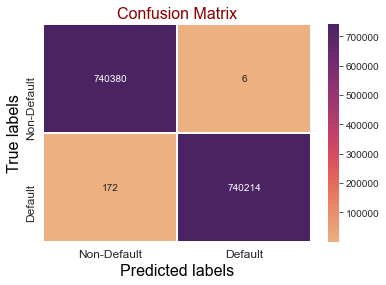

Confusion matrix values
 [[740380      6]
 [   172 740214]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     1.000     1.000    740386

    accuracy                          1.000   1480772
   macro avg      1.000     1.000     1.000   1480772
weighted avg      1.000     1.000     1.000   1480772



ROC_AUC score : 99.988%


In [17]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_smotexg=metrics.confusion_matrix(y_train_smote,y_pred_train_smotexg)

ax= plt.subplot()
sns.heatmap(cm_train_smotexg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_smotexg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_train_smote,y_pred_train_smotexg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_train_smote,y_pred_train_smotexg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluating the test dataset

In [18]:
# prediction for test dataset
y_test_predict_smotexg=xg_clf_smote.predict(individual_X_test)

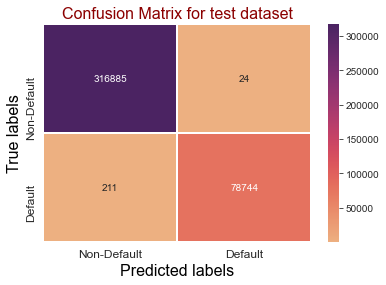

Confusion matrix values
 [[316885     24]
 [   211  78744]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.999     78955

    accuracy                          0.999    395864
   macro avg      1.000     0.999     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.863%


In [19]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_smotexg=metrics.confusion_matrix(individual_y_test,y_test_predict_smotexg)

ax= plt.subplot()
sns.heatmap(cm_test_smotexg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix for test dataset',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_smotexg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_test_predict_smotexg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_test_predict_smotexg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### explainability

In [21]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_xg = SmartExplainer()
xpl_xg.compile(
    x=individual_X_test,
    model=xg_clf_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 1 minutes and 50.88 seconds.


In [22]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_smote_xg=pd.Series(y_test_predict_smotexg)
y_test_pred_smote_xg.index=individual_y_test.index
y_test_pred_smote_xg.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
          ..
596247     0
1277729    0
896701     0
509902     0
75775      1
Length: 395864, dtype: int64

In [23]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_xg = xpl_xg.to_smartpredictor()
predictor_xg.add_input(x=individual_X_test, ypred=y_test_pred_smote_xg)
detailed_contributions_xg = predictor_xg.detail_contributions()
detailed_contributions_xg.head()

timer(start_time)   # end time

ypred     proba loan_amnt      term  int_rate installment     grade  \
344869       0  0.999981 -3.935237  0.004388 -0.005022   -0.982882 -0.032924   
1300957      0  0.999886 -3.793827 -0.009077 -0.088814   -0.904325  1.020414   
1217813      0  0.999982  1.952306  0.007492  0.013938    0.522399 -0.015493   
467206       1  0.999990  1.391401 -0.006983 -0.001977    0.048976  -0.13041   
865505       0  0.999983  0.335466  0.005389 -0.012842   -0.105946 -0.081746   

        sub_grade emp_title emp_length home_ownership annual_inc  \
344869    -0.0026 -0.078741   0.157634      -0.004567  -0.015451   
1300957 -0.540698 -0.069696  -0.081221      -0.098126  -0.005016   
1217813  0.122896  0.097677   0.100819       0.016553   0.045589   
467206   0.102091  0.025736  -0.105567      -0.125714   0.007787   
865505   0.010422   0.14866   0.213481       0.130567   0.050478   

        verification_status   issue_d   purpose     title  zip_code  \
344869            -0.063195  -0.15776 -0.009685  0.032146  0.166047   
1300957            0.069852  -0.21975  0.003677 -0.001582 -0.046332   
1217813           -0.013729 -0.080472    0.0169 -0.026609  0.064237   
467206            -0.193825 -0.158661  0.004861  0.015128  0.009371   
865505            -0.053181  0.281747  0.004479  0.014479 -0.013741   

        addr_state       dti earliest_cr_line inq_last_6mths  open_acc  \
344869     0.04526  0.022738         0.037154       0.182222   0.00719   
1300957  -0.040944 -0.032848         0.042239       0.186748  0.015598   
1217813  -0.031684  0.047507        -0.000369       0.188855  0.003162   
467206     0.00455 -0.000562         0.011348      -0.292115  0.011401   
865505    0.005503  0.014422          0.01502       0.128361  0.003848   

        revol_bal revol_util total_acc initial_list_status total_pymnt  \
344869   0.064162  -0.046184 -0.005501            0.001596    0.002369   
1300957 -0.101734   0.032868 -0.000398            0.003589    0.000877   
1217813  0.042363  -0.170674  0.011651            0.004567    0.010552   
467206   -0.02889   0.068819 -0.041391           -0.003488     0.07622   
865505   0.090699   -0.02889 -0.006609           -0.005163    0.003702   

        total_pymnt_inv total_rec_prncp total_rec_int last_pymnt_d  \
344869        -0.009823        9.608027      0.024047    -0.091396   
1300957       -0.029312        9.326848     -0.294307    -0.011335   
1217813         0.00223        1.381036      0.124071    -0.228391   
467206        -0.008144        8.435898     -0.073225    -0.229281   
865505        -0.007437        6.287283      0.076831      0.52096   

        last_pymnt_amnt last_credit_pull_d tot_cur_bal total_rev_hi_lim  \
344869         2.522746           0.114995    0.029777        -0.025062   
1300957         1.94535           0.055165   -0.040537         0.120408   
1217813        2.819241           0.321434   -0.029752         0.015587   
467206          0.54324           -0.35952   -0.031721        -0.015882   
865505         -1.01404           0.511276    -0.02281           0.0163   

        acc_open_past_24mths avg_cur_bal bc_open_to_buy   bc_util  \
344869              0.017262   -0.005557       0.037684 -0.052756   
1300957              0.04546    0.031522       -0.02345  0.032178   
1217813            -0.009687    -0.01484       0.003266 -0.151132   
467206              -0.00495   -0.006245       0.003852 -0.012602   
865505              0.036537   -0.023007      -0.019947  0.013592   

        mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
344869            0.024911            -0.012876              0.001828   
1300957           0.107989            -0.013895               0.02645   
1217813          -0.020085             0.022281              0.043399   
467206            0.000811            -0.121279               0.00401   
865505           -0.010434             0.025458              0.003987   

        mo_sin_rcnt_tl  mort_acc mths_since_recent_bc mths_since_recent_inq 

In [27]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_xg.modify_mask(max_contrib=5)
explanation_xg = predictor_xg.summarize()
explanation_xg.head()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 30.92 seconds.


In [28]:
# top 5 explanation of the result
explanation_xg.head()

ypred     proba            feature_1   value_1 contribution_1  \
344869       0  0.999981      total_rec_prncp  1.815778       9.608027   
1300957      0  0.999886      total_rec_prncp  1.472794       9.326848   
1217813      0  0.999982  avg_last_fico_range  1.699223       3.408207   
467206       1  0.999990      total_rec_prncp -1.076229       8.435898   
865505       0  0.999983      total_rec_prncp  0.329511       6.287283   

                   feature_2   value_2 contribution_2            feature_3  \
344869             loan_amnt  1.592859      -3.935237  avg_last_fico_range   
1300957            loan_amnt  1.243703      -3.793827  avg_last_fico_range   
1217813      last_pymnt_amnt -0.153981       2.819241            loan_amnt   
467206   avg_last_fico_range -2.180388       2.890137            loan_amnt   
865505   avg_last_fico_range   1.32678       3.410035      last_pymnt_amnt   

          value_3 contribution_3        feature_4   value_4 contribution_4  \
344869   1.699223        3.38883  last_pymnt_amnt  0.026586       2.522746   
1300957  0.209452       2.023665  last_pymnt_amnt  2.387942        1.94535   
1217813 -0.618464       1.952306  total_rec_prncp -0.356458       1.381036   
467206   -0.73485       1.391401  last_pymnt_amnt  -0.74218        0.54324   
865505  -0.758816       -1.01404     last_pymnt_d   12017.0        0.52096   

                  feature_5   value_5 contribution_5  
344869          installment  1.780528      -0.982882  
1300957               grade       5.0       1.020414  
1217813         installment  -0.61382       0.522399  
467206   last_credit_pull_d   22019.0       -0.35952  
865505   last_credit_pull_d   12017.0       0.511276

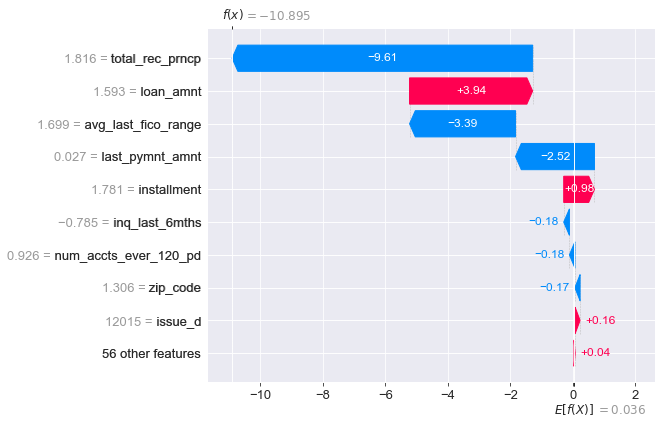


 Time taken: 0 hours 1 minutes and 50.38 seconds.


In [25]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_xg = shap.Explainer(xg_clf_smote)
shap_values_xg = explainer_xg(individual_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_xg[0])

timer(start_time)   # end time

In [1]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_xg[0])

NameError: name 'shap' is not defined

### LightGBM Model

#### Model Learning

In [ ]:
# initializing the classifier
lg_clf_smote=LGBMClassifier(random_state=100)

# fitting the model on resampled dataset
start_time = timer(None) # start time
lg_clf_smote.fit(X_train_smote,y_train_smote)
timer(start_time) # end time

In [33]:
# prediction of resample train dataset using lgbm classifier
y_pred_train_smotelg=lg_clf_smote.predict(X_train_smote)

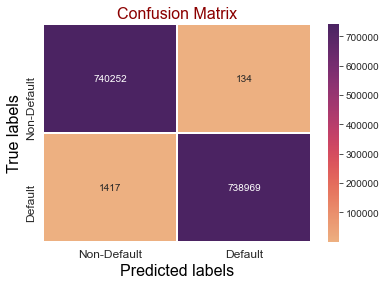

Confusion matrix values
 [[740252    134]
 [  1417 738969]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999    740386
           1      1.000     0.998     0.999    740386

    accuracy                          0.999   1480772
   macro avg      0.999     0.999     0.999   1480772
weighted avg      0.999     0.999     0.999   1480772



ROC_AUC score : 99.895%


In [34]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_smotelg=metrics.confusion_matrix(y_train_smote,y_pred_train_smotelg)

ax= plt.subplot()
sns.heatmap(cm_train_smotelg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_smotelg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_train_smote,y_pred_train_smotelg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_train_smote,y_pred_train_smotelg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluating the test dataset

In [35]:
# prediction of test dataset using lg smote classifier
y_pred_test_smotelg=lg_clf_smote.predict(individual_X_test)

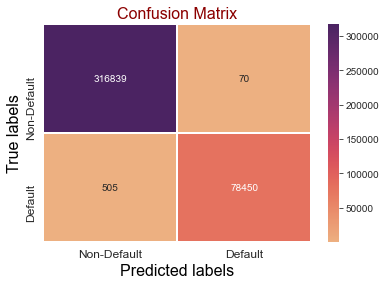

Confusion matrix values
 [[316839     70]
 [   505  78450]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999    316909
           1      0.999     0.994     0.996     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.669%


In [36]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_smotelg=metrics.confusion_matrix(individual_y_test,y_pred_test_smotelg)

ax= plt.subplot()
sns.heatmap(cm_test_smotelg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_smotelg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_smotelg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_smotelg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### explainability

In [39]:
# compiling the test dataset
start_time = timer(None) # start time

smote_xpl_lg = SmartExplainer()
smote_xpl_lg.compile(
    x=individual_X_test,
    model=lg_clf_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 1 minutes and 33.15 seconds.


In [38]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_smote_lg=pd.Series(y_pred_test_smotelg)
y_test_pred_smote_lg.index=individual_y_test.index
y_test_pred_smote_lg.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [41]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_lg = smote_xpl_lg.to_smartpredictor()
predictor_lg.add_input(x=individual_X_test, ypred=y_test_pred_smote_lg)
detailed_contributions_lg = predictor_lg.detail_contributions()
detailed_contributions_lg.head()

timer(start_time)   # end time


 Time taken: 0 hours 5 minutes and 27.37 seconds.


In [42]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_lg.modify_mask(max_contrib=5)
explanation_lg = predictor_lg.summarize()
explanation_lg.head()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 24.43 seconds.


In [43]:
# top 5 explanation of the result
explanation_lg.head()

ypred     proba            feature_1   value_1 contribution_1  \
344869       0  0.999725      total_rec_prncp  1.815778       4.416771   
1300957      0  0.999425      total_rec_prncp  1.472794       5.496643   
1217813      0  0.999829  avg_last_fico_range  1.699223        4.15871   
467206       1  0.999195  avg_last_fico_range -2.180388       3.300688   
865505       0  0.998558  avg_last_fico_range   1.32678       4.232519   

                   feature_2   value_2 contribution_2        feature_3  \
344869   avg_last_fico_range  1.699223       3.937719  last_pymnt_amnt   
1300957  avg_last_fico_range  0.209452       2.523826        loan_amnt   
1217813      last_pymnt_amnt -0.153981       2.493563  total_rec_prncp   
467206       total_rec_prncp -1.076229       2.726911  last_pymnt_amnt   
865505       total_rec_prncp  0.329511       3.952061  last_pymnt_amnt   

          value_3 contribution_3        feature_4   value_4 contribution_4  \
344869   0.026586       2.397024        loan_amnt  1.592859      -1.364629   
1300957  1.243703      -1.232293  last_pymnt_amnt  2.387942       1.207175   
1217813 -0.356458       1.358204        loan_amnt -0.618464       0.973007   
467206   -0.74218       0.634431      installment -0.634767      -0.420217   
865505  -0.758816      -1.897393        loan_amnt  0.079848       0.800872   

                     feature_5   value_5 contribution_5  
344869   num_accts_ever_120_pd  0.925841        0.19814  
1300957       percent_bc_gt_75  1.557649       0.648928  
1217813            installment  -0.61382       0.609748  
467206     verification_status       2.0      -0.108642  
865505          inq_last_6mths -0.784949       0.142038

In [86]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_lg = shap.Explainer(lg_clf_smote)
shap_values_lg = explainer_lg(individual_X_test)
shap.plots.waterfall(shap_values_lg[0])

timer(start_time)   # end time

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [50]:
# plotting the first prediction's explanation with a force plot
#shap.initjs()
#shap.plots.force(shap_values[0])

In [53]:
smote_xpl_lg.plot.top_interactions_plot(nb_top_interactions=5)

### CatBoost Model

#### Model Learning

In [61]:
# initializing the classifier
cat_clf_smote=CatBoostClassifier(random_state=100)

# fitting the model on smote dataset
cat_clf_smote.fit(X_train_smote,y_train_smote)

Learning rate set to 0.232666
0:	learn: 0.2646373	total: 353ms	remaining: 5m 52s
1:	learn: 0.1454802	total: 697ms	remaining: 5m 47s
2:	learn: 0.0997820	total: 1.04s	remaining: 5m 45s
3:	learn: 0.0715929	total: 1.33s	remaining: 5m 31s
4:	learn: 0.0609160	total: 1.61s	remaining: 5m 19s
5:	learn: 0.0538378	total: 1.87s	remaining: 5m 9s
6:	learn: 0.0478451	total: 2.15s	remaining: 5m 5s
7:	learn: 0.0404225	total: 2.48s	remaining: 5m 7s
8:	learn: 0.0366643	total: 2.77s	remaining: 5m 5s
9:	learn: 0.0341407	total: 3.06s	remaining: 5m 2s
10:	learn: 0.0299945	total: 3.41s	remaining: 5m 6s
11:	learn: 0.0284376	total: 3.72s	remaining: 5m 6s
12:	learn: 0.0272306	total: 4.01s	remaining: 5m 4s
13:	learn: 0.0258310	total: 4.31s	remaining: 5m 3s
14:	learn: 0.0248883	total: 4.62s	remaining: 5m 3s
15:	learn: 0.0242540	total: 4.88s	remaining: 5m
16:	learn: 0.0217662	total: 5.21s	remaining: 5m 1s
17:	learn: 0.0207533	total: 5.49s	remaining: 4m 59s
18:	learn: 0.0190131	total: 5.81s	remaining: 5m
19:	learn: 

158:	learn: 0.0039250	total: 41.9s	remaining: 3m 41s
159:	learn: 0.0039249	total: 42.1s	remaining: 3m 41s
160:	learn: 0.0039249	total: 42.3s	remaining: 3m 40s
161:	learn: 0.0039249	total: 42.5s	remaining: 3m 40s
162:	learn: 0.0039248	total: 42.7s	remaining: 3m 39s
163:	learn: 0.0039248	total: 42.9s	remaining: 3m 38s
164:	learn: 0.0039247	total: 43.1s	remaining: 3m 38s
165:	learn: 0.0039247	total: 43.3s	remaining: 3m 37s
166:	learn: 0.0039246	total: 43.5s	remaining: 3m 37s
167:	learn: 0.0039246	total: 43.7s	remaining: 3m 36s
168:	learn: 0.0039246	total: 43.9s	remaining: 3m 36s
169:	learn: 0.0039245	total: 44.1s	remaining: 3m 35s
170:	learn: 0.0039244	total: 44.3s	remaining: 3m 34s
171:	learn: 0.0039243	total: 44.5s	remaining: 3m 34s
172:	learn: 0.0039243	total: 44.7s	remaining: 3m 33s
173:	learn: 0.0039243	total: 44.9s	remaining: 3m 33s
174:	learn: 0.0039243	total: 45.1s	remaining: 3m 32s
175:	learn: 0.0039242	total: 45.3s	remaining: 3m 32s
176:	learn: 0.0039242	total: 45.5s	remaining: 

314:	learn: 0.0032709	total: 1m 18s	remaining: 2m 50s
315:	learn: 0.0032709	total: 1m 18s	remaining: 2m 50s
316:	learn: 0.0032709	total: 1m 19s	remaining: 2m 50s
317:	learn: 0.0032708	total: 1m 19s	remaining: 2m 49s
318:	learn: 0.0032708	total: 1m 19s	remaining: 2m 49s
319:	learn: 0.0032708	total: 1m 19s	remaining: 2m 49s
320:	learn: 0.0032708	total: 1m 19s	remaining: 2m 49s
321:	learn: 0.0032708	total: 1m 20s	remaining: 2m 48s
322:	learn: 0.0032708	total: 1m 20s	remaining: 2m 48s
323:	learn: 0.0032708	total: 1m 20s	remaining: 2m 48s
324:	learn: 0.0032708	total: 1m 20s	remaining: 2m 47s
325:	learn: 0.0032708	total: 1m 21s	remaining: 2m 47s
326:	learn: 0.0032708	total: 1m 21s	remaining: 2m 47s
327:	learn: 0.0032708	total: 1m 21s	remaining: 2m 47s
328:	learn: 0.0032708	total: 1m 21s	remaining: 2m 46s
329:	learn: 0.0032708	total: 1m 22s	remaining: 2m 46s
330:	learn: 0.0032708	total: 1m 22s	remaining: 2m 46s
331:	learn: 0.0032708	total: 1m 22s	remaining: 2m 45s
332:	learn: 0.0032707	total:

466:	learn: 0.0032366	total: 1m 54s	remaining: 2m 10s
467:	learn: 0.0032366	total: 1m 54s	remaining: 2m 9s
468:	learn: 0.0032366	total: 1m 54s	remaining: 2m 9s
469:	learn: 0.0032366	total: 1m 54s	remaining: 2m 9s
470:	learn: 0.0032366	total: 1m 55s	remaining: 2m 9s
471:	learn: 0.0032219	total: 1m 55s	remaining: 2m 9s
472:	learn: 0.0032219	total: 1m 55s	remaining: 2m 8s
473:	learn: 0.0032218	total: 1m 55s	remaining: 2m 8s
474:	learn: 0.0032218	total: 1m 56s	remaining: 2m 8s
475:	learn: 0.0032218	total: 1m 56s	remaining: 2m 8s
476:	learn: 0.0031679	total: 1m 56s	remaining: 2m 7s
477:	learn: 0.0031678	total: 1m 56s	remaining: 2m 7s
478:	learn: 0.0031678	total: 1m 57s	remaining: 2m 7s
479:	learn: 0.0031677	total: 1m 57s	remaining: 2m 7s
480:	learn: 0.0031677	total: 1m 57s	remaining: 2m 6s
481:	learn: 0.0031677	total: 1m 57s	remaining: 2m 6s
482:	learn: 0.0031677	total: 1m 57s	remaining: 2m 6s
483:	learn: 0.0031677	total: 1m 58s	remaining: 2m 6s
484:	learn: 0.0031676	total: 1m 58s	remaining

620:	learn: 0.0030760	total: 2m 29s	remaining: 1m 31s
621:	learn: 0.0030760	total: 2m 30s	remaining: 1m 31s
622:	learn: 0.0030760	total: 2m 30s	remaining: 1m 30s
623:	learn: 0.0030760	total: 2m 30s	remaining: 1m 30s
624:	learn: 0.0030760	total: 2m 30s	remaining: 1m 30s
625:	learn: 0.0030741	total: 2m 30s	remaining: 1m 30s
626:	learn: 0.0030741	total: 2m 31s	remaining: 1m 29s
627:	learn: 0.0030741	total: 2m 31s	remaining: 1m 29s
628:	learn: 0.0030741	total: 2m 31s	remaining: 1m 29s
629:	learn: 0.0030741	total: 2m 31s	remaining: 1m 29s
630:	learn: 0.0030741	total: 2m 31s	remaining: 1m 28s
631:	learn: 0.0030741	total: 2m 32s	remaining: 1m 28s
632:	learn: 0.0030741	total: 2m 32s	remaining: 1m 28s
633:	learn: 0.0030740	total: 2m 32s	remaining: 1m 28s
634:	learn: 0.0030740	total: 2m 32s	remaining: 1m 27s
635:	learn: 0.0030740	total: 2m 33s	remaining: 1m 27s
636:	learn: 0.0030740	total: 2m 33s	remaining: 1m 27s
637:	learn: 0.0030740	total: 2m 33s	remaining: 1m 27s
638:	learn: 0.0030740	total:

774:	learn: 0.0030632	total: 3m 5s	remaining: 53.8s
775:	learn: 0.0030632	total: 3m 5s	remaining: 53.6s
776:	learn: 0.0030632	total: 3m 5s	remaining: 53.4s
777:	learn: 0.0030632	total: 3m 6s	remaining: 53.1s
778:	learn: 0.0030632	total: 3m 6s	remaining: 52.9s
779:	learn: 0.0030632	total: 3m 6s	remaining: 52.6s
780:	learn: 0.0030632	total: 3m 6s	remaining: 52.4s
781:	learn: 0.0030632	total: 3m 7s	remaining: 52.1s
782:	learn: 0.0030632	total: 3m 7s	remaining: 51.9s
783:	learn: 0.0030631	total: 3m 7s	remaining: 51.7s
784:	learn: 0.0030631	total: 3m 7s	remaining: 51.4s
785:	learn: 0.0030631	total: 3m 7s	remaining: 51.2s
786:	learn: 0.0030631	total: 3m 8s	remaining: 50.9s
787:	learn: 0.0030631	total: 3m 8s	remaining: 50.7s
788:	learn: 0.0030631	total: 3m 8s	remaining: 50.5s
789:	learn: 0.0030631	total: 3m 8s	remaining: 50.2s
790:	learn: 0.0030631	total: 3m 9s	remaining: 50s
791:	learn: 0.0030631	total: 3m 9s	remaining: 49.7s
792:	learn: 0.0030630	total: 3m 9s	remaining: 49.5s
793:	learn: 0.

930:	learn: 0.0030178	total: 3m 42s	remaining: 16.5s
931:	learn: 0.0030177	total: 3m 42s	remaining: 16.3s
932:	learn: 0.0030177	total: 3m 43s	remaining: 16s
933:	learn: 0.0030177	total: 3m 43s	remaining: 15.8s
934:	learn: 0.0030177	total: 3m 43s	remaining: 15.5s
935:	learn: 0.0030177	total: 3m 43s	remaining: 15.3s
936:	learn: 0.0030177	total: 3m 44s	remaining: 15.1s
937:	learn: 0.0030177	total: 3m 44s	remaining: 14.8s
938:	learn: 0.0030177	total: 3m 44s	remaining: 14.6s
939:	learn: 0.0030176	total: 3m 44s	remaining: 14.3s
940:	learn: 0.0030176	total: 3m 45s	remaining: 14.1s
941:	learn: 0.0030176	total: 3m 45s	remaining: 13.9s
942:	learn: 0.0030176	total: 3m 45s	remaining: 13.6s
943:	learn: 0.0030176	total: 3m 45s	remaining: 13.4s
944:	learn: 0.0030176	total: 3m 46s	remaining: 13.2s
945:	learn: 0.0030176	total: 3m 46s	remaining: 12.9s
946:	learn: 0.0030176	total: 3m 46s	remaining: 12.7s
947:	learn: 0.0030176	total: 3m 46s	remaining: 12.4s
948:	learn: 0.0030176	total: 3m 46s	remaining: 1

In [62]:
# prediction of smote train dataset using catboost classifier
y_train_pred_smote_cat=cat_clf_smote.predict(X_train_smote)

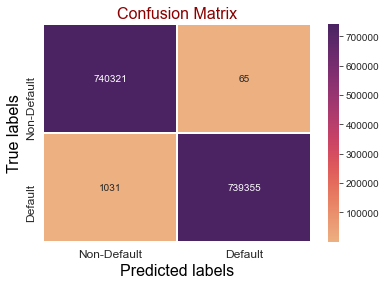

Confusion matrix values
 [[740321     65]
 [  1031 739355]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    740386
           1      1.000     0.999     0.999    740386

    accuracy                          0.999   1480772
   macro avg      0.999     0.999     0.999   1480772
weighted avg      0.999     0.999     0.999   1480772



ROC_AUC score : 99.926%


In [63]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_smote_cat=metrics.confusion_matrix(y_train_smote,y_train_pred_smote_cat)

ax= plt.subplot()
sns.heatmap(cm_train_smote_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_smote_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_train_smote,y_train_pred_smote_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_train_smote,y_train_pred_smote_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluting the test dataset

In [64]:
# prediction for test dataset using smote catboost classifier
y_test_predict_smote_cat=cat_clf_smote.predict(individual_X_test)

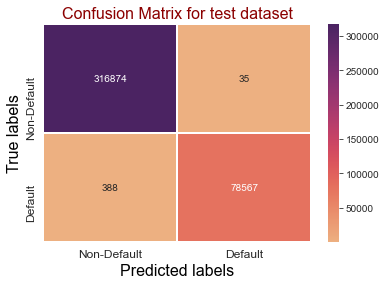

Confusion matrix values
 [[316874     35]
 [   388  78567]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      1.000     0.995     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.749%


In [65]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_smote_cat=metrics.confusion_matrix(individual_y_test,y_test_predict_smote_cat)

ax= plt.subplot()
sns.heatmap(cm_test_smote_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix for test dataset',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_smote_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_test_predict_smote_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_test_predict_smote_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Explainability of the result

In [69]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_cat = SmartExplainer()
xpl_cat.compile(
    x=individual_X_test,
    model=cat_clf_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 45.9 seconds.


In [67]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_smote_cat=pd.Series(y_test_predict_smote_cat)
y_test_pred_smote_cat.index=individual_y_test.index
y_test_pred_smote_cat.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [71]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_cat = xpl_cat.to_smartpredictor()
predictor_cat.add_input(x=individual_X_test, ypred=y_test_pred_smote_cat)
detailed_contributions_cat = predictor_cat.detail_contributions()
detailed_contributions_cat.head()

timer(start_time)   # end time


 Time taken: 0 hours 2 minutes and 57.54 seconds.


In [73]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_cat.modify_mask(max_contrib=5)
explanation_cat = predictor_cat.summarize()

timer(start_time)   # end time



 Time taken: 0 hours 1 minutes and 19.07 seconds.


In [74]:
# top 5 result explanation of the test prediction
explanation_cat.head()

ypred     proba        feature_1   value_1 contribution_1  \
344869       0  0.999744  total_rec_prncp  1.815778      15.615526   
1300957      0  0.999809  total_rec_prncp  1.472794      15.062048   
1217813      0  0.999878  total_rec_prncp -0.356458       5.493265   
467206       1  1.000000  total_rec_prncp -1.076229      12.737412   
865505       0  0.999698  total_rec_prncp  0.329511      12.878734   

                   feature_2   value_2 contribution_2            feature_3  \
344869             loan_amnt  1.592859      -5.841533      last_pymnt_amnt   
1300957            loan_amnt  1.243703      -5.275841      last_pymnt_amnt   
1217813      last_pymnt_amnt -0.153981       3.710799  avg_last_fico_range   
467206             loan_amnt  -0.73485      -4.191672  avg_last_fico_range   
865505   avg_last_fico_range   1.32678       4.530689      last_pymnt_amnt   

          value_3 contribution_3            feature_4   value_4  \
344869   0.026586       3.768595  avg_last_fico_range  1.699223   
1300957  2.387942       3.721557  avg_last_fico_range  0.209452   
1217813  1.699223       3.556661            loan_amnt -0.618464   
467206  -2.180388       3.140594      last_pymnt_amnt  -0.74218   
865505  -0.758816      -2.003519          installment  0.153129   

        contribution_4    feature_5   value_5 contribution_5  
344869        3.686099  installment  1.780528      -1.307453  
1300957       3.238501  installment  1.552001      -1.054828  
1217813       3.331703  total_pymnt -0.475869       0.188087  
467206        1.372571  total_pymnt -1.081318       0.629686  
865505       -0.786205    loan_amnt  0.079848      -0.634023

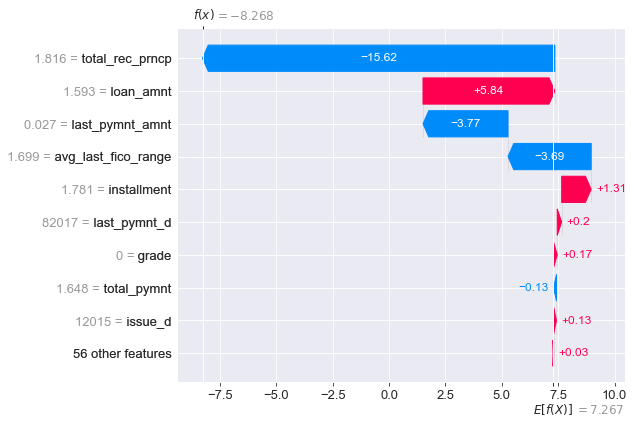


 Time taken: 0 hours 0 minutes and 41.38 seconds.


In [75]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_cat = shap.Explainer(cat_clf_smote)
shap_values_cat = explainer_cat(individual_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_cat[0])

timer(start_time)   # end time

In [76]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_cat[0])

### Stacking Model

#### Model Learning

In [79]:
# initializing the classifiers
clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
sclf_smote = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

# fitting the model
start_time = timer(None)
sclf_smote.fit(X_train_smote,y_train_smote)
timer(start_time)

[17:29:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.232666
0:	learn: 0.2646373	total: 368ms	remaining: 6m 7s
1:	learn: 0.1454802	total: 703ms	remaining: 5m 50s
2:	learn: 0.0997820	total: 1.03s	remaining: 5m 43s
3:	learn: 0.0715929	total: 1.32s	remaining: 5m 28s
4:	learn: 0.0609160	total: 1.6s	remaining: 5m 17s
5:	learn: 0.0538378	total: 1.86s	remaining: 5m 8s
6:	learn: 0.0478451	total: 2.14s	remaining: 5m 4s
7:	learn: 0.0404225	total: 2.49s	remaining: 5m 8s
8:	learn: 0.0366643	total: 2.78s	remaining: 5m 5s
9:	learn: 0.0341407	total: 3.07s	remaining: 5m 3s
10:	learn: 0.0299945	total: 3.4s	remaining: 5m 6s
11:	learn: 0.0284376	total: 3.69s	remaining: 5m 3s
12:	learn: 0.0272306	total: 3.98s	remaining: 5m 2s
13:	l

153:	learn: 0.0039252	total: 41.3s	remaining: 3m 46s
154:	learn: 0.0039252	total: 41.5s	remaining: 3m 46s
155:	learn: 0.0039252	total: 41.7s	remaining: 3m 45s
156:	learn: 0.0039252	total: 41.9s	remaining: 3m 45s
157:	learn: 0.0039251	total: 42.1s	remaining: 3m 44s
158:	learn: 0.0039250	total: 42.4s	remaining: 3m 44s
159:	learn: 0.0039249	total: 42.6s	remaining: 3m 43s
160:	learn: 0.0039249	total: 42.8s	remaining: 3m 42s
161:	learn: 0.0039249	total: 43s	remaining: 3m 42s
162:	learn: 0.0039248	total: 43.2s	remaining: 3m 41s
163:	learn: 0.0039248	total: 43.4s	remaining: 3m 41s
164:	learn: 0.0039247	total: 43.6s	remaining: 3m 40s
165:	learn: 0.0039247	total: 43.8s	remaining: 3m 40s
166:	learn: 0.0039246	total: 44s	remaining: 3m 39s
167:	learn: 0.0039246	total: 44.2s	remaining: 3m 39s
168:	learn: 0.0039246	total: 44.4s	remaining: 3m 38s
169:	learn: 0.0039245	total: 44.6s	remaining: 3m 37s
170:	learn: 0.0039244	total: 44.8s	remaining: 3m 37s
171:	learn: 0.0039243	total: 45.1s	remaining: 3m 3

309:	learn: 0.0032710	total: 1m 19s	remaining: 2m 55s
310:	learn: 0.0032710	total: 1m 19s	remaining: 2m 55s
311:	learn: 0.0032709	total: 1m 19s	remaining: 2m 55s
312:	learn: 0.0032709	total: 1m 19s	remaining: 2m 55s
313:	learn: 0.0032709	total: 1m 19s	remaining: 2m 54s
314:	learn: 0.0032709	total: 1m 20s	remaining: 2m 54s
315:	learn: 0.0032709	total: 1m 20s	remaining: 2m 54s
316:	learn: 0.0032709	total: 1m 20s	remaining: 2m 53s
317:	learn: 0.0032708	total: 1m 20s	remaining: 2m 53s
318:	learn: 0.0032708	total: 1m 21s	remaining: 2m 53s
319:	learn: 0.0032708	total: 1m 21s	remaining: 2m 52s
320:	learn: 0.0032708	total: 1m 21s	remaining: 2m 52s
321:	learn: 0.0032708	total: 1m 21s	remaining: 2m 52s
322:	learn: 0.0032708	total: 1m 22s	remaining: 2m 52s
323:	learn: 0.0032708	total: 1m 22s	remaining: 2m 51s
324:	learn: 0.0032708	total: 1m 22s	remaining: 2m 51s
325:	learn: 0.0032708	total: 1m 22s	remaining: 2m 51s
326:	learn: 0.0032708	total: 1m 23s	remaining: 2m 50s
327:	learn: 0.0032708	total:

461:	learn: 0.0032367	total: 1m 55s	remaining: 2m 14s
462:	learn: 0.0032367	total: 1m 55s	remaining: 2m 14s
463:	learn: 0.0032367	total: 1m 55s	remaining: 2m 13s
464:	learn: 0.0032367	total: 1m 56s	remaining: 2m 13s
465:	learn: 0.0032366	total: 1m 56s	remaining: 2m 13s
466:	learn: 0.0032366	total: 1m 56s	remaining: 2m 13s
467:	learn: 0.0032366	total: 1m 56s	remaining: 2m 12s
468:	learn: 0.0032366	total: 1m 57s	remaining: 2m 12s
469:	learn: 0.0032366	total: 1m 57s	remaining: 2m 12s
470:	learn: 0.0032366	total: 1m 57s	remaining: 2m 12s
471:	learn: 0.0032219	total: 1m 57s	remaining: 2m 11s
472:	learn: 0.0032219	total: 1m 58s	remaining: 2m 11s
473:	learn: 0.0032218	total: 1m 58s	remaining: 2m 11s
474:	learn: 0.0032218	total: 1m 58s	remaining: 2m 11s
475:	learn: 0.0032218	total: 1m 58s	remaining: 2m 10s
476:	learn: 0.0031679	total: 1m 59s	remaining: 2m 10s
477:	learn: 0.0031678	total: 1m 59s	remaining: 2m 10s
478:	learn: 0.0031678	total: 1m 59s	remaining: 2m 10s
479:	learn: 0.0031677	total:

615:	learn: 0.0030761	total: 2m 32s	remaining: 1m 35s
616:	learn: 0.0030761	total: 2m 32s	remaining: 1m 34s
617:	learn: 0.0030760	total: 2m 32s	remaining: 1m 34s
618:	learn: 0.0030760	total: 2m 33s	remaining: 1m 34s
619:	learn: 0.0030760	total: 2m 33s	remaining: 1m 34s
620:	learn: 0.0030760	total: 2m 33s	remaining: 1m 33s
621:	learn: 0.0030760	total: 2m 33s	remaining: 1m 33s
622:	learn: 0.0030760	total: 2m 34s	remaining: 1m 33s
623:	learn: 0.0030760	total: 2m 34s	remaining: 1m 33s
624:	learn: 0.0030760	total: 2m 34s	remaining: 1m 32s
625:	learn: 0.0030741	total: 2m 34s	remaining: 1m 32s
626:	learn: 0.0030741	total: 2m 35s	remaining: 1m 32s
627:	learn: 0.0030741	total: 2m 35s	remaining: 1m 31s
628:	learn: 0.0030741	total: 2m 35s	remaining: 1m 31s
629:	learn: 0.0030741	total: 2m 35s	remaining: 1m 31s
630:	learn: 0.0030741	total: 2m 35s	remaining: 1m 31s
631:	learn: 0.0030741	total: 2m 36s	remaining: 1m 30s
632:	learn: 0.0030741	total: 2m 36s	remaining: 1m 30s
633:	learn: 0.0030740	total:

769:	learn: 0.0030633	total: 3m 10s	remaining: 56.8s
770:	learn: 0.0030633	total: 3m 10s	remaining: 56.5s
771:	learn: 0.0030633	total: 3m 10s	remaining: 56.3s
772:	learn: 0.0030633	total: 3m 10s	remaining: 56s
773:	learn: 0.0030633	total: 3m 11s	remaining: 55.8s
774:	learn: 0.0030632	total: 3m 11s	remaining: 55.6s
775:	learn: 0.0030632	total: 3m 11s	remaining: 55.3s
776:	learn: 0.0030632	total: 3m 11s	remaining: 55.1s
777:	learn: 0.0030632	total: 3m 12s	remaining: 54.8s
778:	learn: 0.0030632	total: 3m 12s	remaining: 54.6s
779:	learn: 0.0030632	total: 3m 12s	remaining: 54.3s
780:	learn: 0.0030632	total: 3m 12s	remaining: 54.1s
781:	learn: 0.0030632	total: 3m 13s	remaining: 53.8s
782:	learn: 0.0030632	total: 3m 13s	remaining: 53.6s
783:	learn: 0.0030631	total: 3m 13s	remaining: 53.4s
784:	learn: 0.0030631	total: 3m 13s	remaining: 53.1s
785:	learn: 0.0030631	total: 3m 14s	remaining: 52.9s
786:	learn: 0.0030631	total: 3m 14s	remaining: 52.6s
787:	learn: 0.0030631	total: 3m 14s	remaining: 5

925:	learn: 0.0030178	total: 3m 49s	remaining: 18.3s
926:	learn: 0.0030178	total: 3m 49s	remaining: 18.1s
927:	learn: 0.0030178	total: 3m 49s	remaining: 17.8s
928:	learn: 0.0030178	total: 3m 50s	remaining: 17.6s
929:	learn: 0.0030178	total: 3m 50s	remaining: 17.3s
930:	learn: 0.0030178	total: 3m 50s	remaining: 17.1s
931:	learn: 0.0030177	total: 3m 50s	remaining: 16.8s
932:	learn: 0.0030177	total: 3m 51s	remaining: 16.6s
933:	learn: 0.0030177	total: 3m 51s	remaining: 16.3s
934:	learn: 0.0030177	total: 3m 51s	remaining: 16.1s
935:	learn: 0.0030177	total: 3m 51s	remaining: 15.8s
936:	learn: 0.0030177	total: 3m 51s	remaining: 15.6s
937:	learn: 0.0030177	total: 3m 52s	remaining: 15.3s
938:	learn: 0.0030177	total: 3m 52s	remaining: 15.1s
939:	learn: 0.0030176	total: 3m 52s	remaining: 14.9s
940:	learn: 0.0030176	total: 3m 53s	remaining: 14.6s
941:	learn: 0.0030176	total: 3m 53s	remaining: 14.4s
942:	learn: 0.0030176	total: 3m 53s	remaining: 14.1s
943:	learn: 0.0030176	total: 3m 53s	remaining:

In [80]:
# prediction of resample train dataset using stacking classifier
y_pred_train_smote_stack=sclf_smote.predict(X_train_smote)

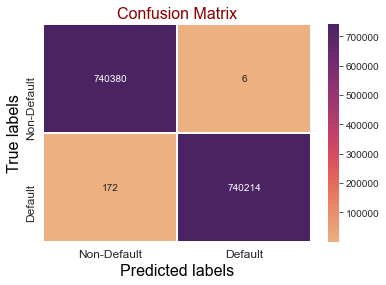

Confusion matrix values
 [[740380      6]
 [   172 740214]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     1.000     1.000    740386

    accuracy                          1.000   1480772
   macro avg      1.000     1.000     1.000   1480772
weighted avg      1.000     1.000     1.000   1480772



ROC_AUC score : 99.988%


In [81]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_smote_stack=metrics.confusion_matrix(y_train_smote,y_pred_train_smote_stack)

ax= plt.subplot()
sns.heatmap(cm_train_smote_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_smote_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(y_train_smote,y_pred_train_smote_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(y_train_smote,y_pred_train_smote_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluating the test dataset

In [82]:
# prediction of test dataset using lg smote classifier
y_pred_test_smote_stack=sclf_smote.predict(individual_X_test)

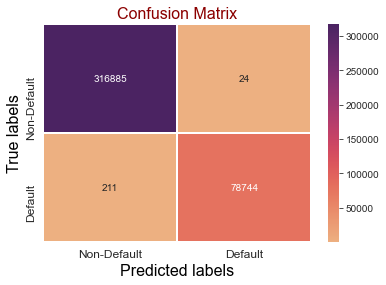

Confusion matrix values
 [[316885     24]
 [   211  78744]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.999     78955

    accuracy                          0.999    395864
   macro avg      1.000     0.999     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.863%


In [83]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_smote_stack=metrics.confusion_matrix(individual_y_test,y_pred_test_smote_stack)

ax= plt.subplot()
sns.heatmap(cm_test_smote_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_smote_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_smote_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_smote_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# Joint Dataset

## Preprocessing

In [87]:
# reading the dataset
joint_df=pd.read_csv('joint_app_df.csv').iloc[:,1:]
joint_df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0    20000.0     1     10.78       432.66      1          8      10792   
1    15000.0     0     11.99       498.15      2         10       4761   
2    24000.0     1     23.13       678.37      5         26       2016   
3    24000.0     1     13.44       551.50      2         12       9257   
4     8750.0     0     18.99       320.70      4         20       5881   

   emp_length  home_ownership  annual_inc  verification_status  issue_d  \
0           1               0    63000.00                    0   122015   
1           0               0    65000.00                    1   122015   
2           6               0    43435.00                    2   122015   
3           0               0    96000.00                    2   122015   
4           0               3    29524.32                    2   122015   

   purpose  title  zip_code  addr_state    dti  earliest_cr_line  \
0        3      3        60          13  10.78             82000   
1        2      3        91           4  17.56             82004   
2        2      3        77          42  35.70             71998   
3        1      3        64          23  22.70             62001   
4        2      3        60          13  46.71             81998   

   inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
0             0.0       6.0     7869.0        56.2       18.0   
1             0.0       9.0    13028.0        88.3       16.0   
2             0.0      13.0    12508.0        73.1       22.0   
3             1.0      13.0    19403.0        53.3       24.0   
4             0.0       9.0     2412.0        96.5       12.0   

   initial_list_status   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0                    1  22705.924294         22705.92         20000.00   
1                    1  15183.460000         15183.46         15000.00   
2                    1  27488.251245         27488.25         24000.00   
3                    1  30785.080592         30785.08         24000.00   
4                    1   7575.680000          7575.68          4497.71   

   total_rec_int  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
0      2705.9200         62017         15813.30               32019   
1       183.4600         22016         15208.44               22016   
2      3488.2500         92016           417.35               72018   
3      6363.4475         82018         14284.88               82018   
4      2153.9000         92017           320.70               12018   

   annual_inc_joint  dti_joint  verification_status_joint  tot_cur_bal  \
0          71000.00      13.85                          0     189699.0   
1          77000.00      15.40                          0     231860.0   
2         113314.00      25.44                          0     182215.0   
3         117000.00      22.76                          0     220879.0   
4          94348.32      17.07                          0      94802.0   

   open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
0          0.0          1.0          0.0          4.0                19.0   
1          0.0          0.0          0.0          0.0                30.0   
2          0.0          6.0          2.0          5.0                10.0   
3          0.0          4.0          1.0          3.0                10.0   
4          2.0          6.0          2.0          3.0                 3.0   

   total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0       10827.0     73.0          0.0          2.0      2081.0      65.0   
1       22525.0     74.0          0.0          2.0      2839.0      78.0   
2       48582.0     75.0          0.0          1.0      5690.0      74.0   
3       43145.0     70.0          1.0          3.0      6210.0      64.0   
4       92313.0     89.0          0.0          1.0      1458.0      89.0   

   total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_

In [88]:
# splitting the target feature
X_joint=joint_df.drop('target',axis=1)
y_joint=joint_df['target']

In [89]:
# splitting into the train and test dataset

joint_X_train, joint_X_test, joint_y_train, joint_y_test = train_test_split(X_joint, y_joint, test_size=0.3,random_state=100)

In [90]:
# categorical variable
cat_var_joint=pd.Index(['term', 'grade', 'sub_grade','emp_title', 'emp_length','home_ownership', 'verification_status','issue_d',
               'purpose','title','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','last_credit_pull_d',
               'verification_status_joint','sec_app_earliest_cr_line','disbursement_method','debt_settlement_flag'])

In [91]:
# creating a list of columns for numerical features only
numerical_cols=joint_X_train.columns
len(numerical_cols)

89

In [92]:
numerical_cols=numerical_cols.drop(cat_var_joint)
len(numerical_cols)

70

In [93]:
scaler = StandardScaler()

# scaling the train dataset
joint_X_train[numerical_cols]=scaler.fit_transform(joint_X_train[numerical_cols])
joint_X_train.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
23453  -1.366827     0  1.021190    -1.232259      3         18      10411   
22576  -0.397440     0  0.841296    -0.059205      3         17        759   
7379   -1.706112     0  0.481508    -1.601311      3         15       4020   
18536   1.056640     0 -0.186139     1.447489      2         11       5000   
18821   0.087254     0 -0.186139     0.354753      2         11       7031   

       emp_length  home_ownership  annual_inc  verification_status  issue_d  \
23453          10               0    0.217815                    0   102017   
22576          10               3   -0.532009                    2   102017   
7379            0               3   -0.361594                    1    72017   
18536          10               0   -0.191180                    1    12017   
18821           0               0    0.534786                    1    12017   

       purpose  title  zip_code  addr_state       dti  earliest_cr_line  \
23453        8     10 -0.039667          47 -0.032143            101984   
22576        5      7 -1.511168          33 -0.411410             32001   
7379         7      9 -0.909190          26 -1.267243             32000   
18536        2      3  1.264617           4  0.045961            112001   
18821        2      3 -0.909190          26  0.550327            102008   

       inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
23453       -0.674973 -0.802954  -0.756026    1.200109  -0.130360   
22576        2.303581 -1.000703  -0.987488   -0.204669   0.144031   
7379        -0.674973 -1.000703  -1.150468   -1.714223  -1.502314   
18536       -0.674973  1.570044  -0.773030   -1.124372   2.430621   
18821       -0.674973  0.185795  -0.458405    0.319212   1.424521   

       initial_list_status  total_pymnt  total_pymnt_inv  total_rec_prncp  \
23453                    1    -0.964614        -0.964410        -0.882115   
22576                    1    -0.854301        -0.854058        -1.025939   
7379                     0    -1.295739        -1.295649        -1.188018   
18536                    1     0.253304         0.253929        -0.139955   
18821                    1     0.456565         0.457261         0.428895   

       total_rec_int  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
23453      -0.680767         82018        -0.608063              102017   
22576       0.062886         82018        -0.947176               22019   
7379       -0.971362        122018        -0.963250              122018   
18536       1.553846         82018        -0.902970               12019   
18821       0.578766         62018         0.207728               22019   

       annual_inc_joint  dti_joint  verification_status_joint  tot_cur_bal  \
23453          0.642976   1.454853                          0    -0.242856   
22576         -1.210419  -0.108410                          0    -0.636605   
7379          -0.652167  -1.001892                          1    -1.085631   
18536         -0.272556   0.113973                          0     0.219157   
18821          0.270064   0.579794                          0     0.773601   

       open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
23453     0.214433    -0.249839    -0.882521    -1.127961            1.650624   
22576     1.470029    -0.249839     1.758827     1.639037           -1.065051   
7379      1.470029    -0.817953     0.438153    -0.436211           -0.909870   
18536     1.470029    -0.817953    -0.882521    -0.436211            0.486763   
18821     0.214433     0.886388     0.438153     2.330787           -0.754688   

       total_bal_il   il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
23453     -0.685386 -1.156927    -0.123683     0.227683    0.048625 -0.093468   
22576      1.422151  1.556913     0.719413     0.227683   -1.321918  1.256334   
7379      -0.693223  1.279990    -0.123683    -0.248564   -1.147653 -1.057613   
185

In [94]:
# scaling the test dataset
joint_X_test[numerical_cols]=scaler.transform(joint_X_test[numerical_cols])
joint_X_train.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
23453  -1.366827     0  1.021190    -1.232259      3         18      10411   
22576  -0.397440     0  0.841296    -0.059205      3         17        759   
7379   -1.706112     0  0.481508    -1.601311      3         15       4020   
18536   1.056640     0 -0.186139     1.447489      2         11       5000   
18821   0.087254     0 -0.186139     0.354753      2         11       7031   

       emp_length  home_ownership  annual_inc  verification_status  issue_d  \
23453          10               0    0.217815                    0   102017   
22576          10               3   -0.532009                    2   102017   
7379            0               3   -0.361594                    1    72017   
18536          10               0   -0.191180                    1    12017   
18821           0               0    0.534786                    1    12017   

       purpose  title  zip_code  addr_state       dti  earliest_cr_line  \
23453        8     10 -0.039667          47 -0.032143            101984   
22576        5      7 -1.511168          33 -0.411410             32001   
7379         7      9 -0.909190          26 -1.267243             32000   
18536        2      3  1.264617           4  0.045961            112001   
18821        2      3 -0.909190          26  0.550327            102008   

       inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
23453       -0.674973 -0.802954  -0.756026    1.200109  -0.130360   
22576        2.303581 -1.000703  -0.987488   -0.204669   0.144031   
7379        -0.674973 -1.000703  -1.150468   -1.714223  -1.502314   
18536       -0.674973  1.570044  -0.773030   -1.124372   2.430621   
18821       -0.674973  0.185795  -0.458405    0.319212   1.424521   

       initial_list_status  total_pymnt  total_pymnt_inv  total_rec_prncp  \
23453                    1    -0.964614        -0.964410        -0.882115   
22576                    1    -0.854301        -0.854058        -1.025939   
7379                     0    -1.295739        -1.295649        -1.188018   
18536                    1     0.253304         0.253929        -0.139955   
18821                    1     0.456565         0.457261         0.428895   

       total_rec_int  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  \
23453      -0.680767         82018        -0.608063              102017   
22576       0.062886         82018        -0.947176               22019   
7379       -0.971362        122018        -0.963250              122018   
18536       1.553846         82018        -0.902970               12019   
18821       0.578766         62018         0.207728               22019   

       annual_inc_joint  dti_joint  verification_status_joint  tot_cur_bal  \
23453          0.642976   1.454853                          0    -0.242856   
22576         -1.210419  -0.108410                          0    -0.636605   
7379          -0.652167  -1.001892                          1    -1.085631   
18536         -0.272556   0.113973                          0     0.219157   
18821          0.270064   0.579794                          0     0.773601   

       open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
23453     0.214433    -0.249839    -0.882521    -1.127961            1.650624   
22576     1.470029    -0.249839     1.758827     1.639037           -1.065051   
7379      1.470029    -0.817953     0.438153    -0.436211           -0.909870   
18536     1.470029    -0.817953    -0.882521    -0.436211            0.486763   
18821     0.214433     0.886388     0.438153     2.330787           -0.754688   

       total_bal_il   il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
23453     -0.685386 -1.156927    -0.123683     0.227683    0.048625 -0.093468   
22576      1.422151  1.556913     0.719413     0.227683   -1.321918  1.256334   
7379      -0.693223  1.279990    -0.123683    -0.248564   -1.147653 -1.057613   
185

## Resampling of the train dataset

In [95]:
# oversampling the minority class using SMOTE
smote=SMOTE("minority")

start_time = timer(None) # timing starts from this point for "start_time" variable
jnt_X_train_smote,jnt_y_train_smote=smote.fit_resample(joint_X_train,joint_y_train)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.75 seconds.


## Modeling

### XGBoost Model

#### Model Learning

In [96]:
# initializing the classifier
xg_clf_joint_smote=XGBClassifier(random_state=100)

# fitting the model
xg_clf_joint_smote.fit(jnt_X_train_smote,jnt_y_train_smote)

[18:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
# prediction of smote train dataset using xg classifier
y_train_pred_jnt_smote_xg=xg_clf_joint_smote.predict(jnt_X_train_smote)

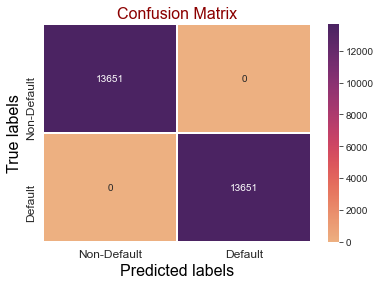

Confusion matrix values
 [[13651     0]
 [    0 13651]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     13651

    accuracy                          1.000     27302
   macro avg      1.000     1.000     1.000     27302
weighted avg      1.000     1.000     1.000     27302



ROC_AUC score : 100.0%


In [98]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_smote_xg=metrics.confusion_matrix(jnt_y_train_smote,y_train_pred_jnt_smote_xg)

ax= plt.subplot()
sns.heatmap(cm_jnt_smote_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_smote_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(jnt_y_train_smote,y_train_pred_jnt_smote_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(jnt_y_train_smote,y_train_pred_jnt_smote_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test dataset

In [99]:
# prediction for test dataset using smote classifier
y_test_pred_jnt_smote_xg=xg_clf_joint_smote.predict(joint_X_test)

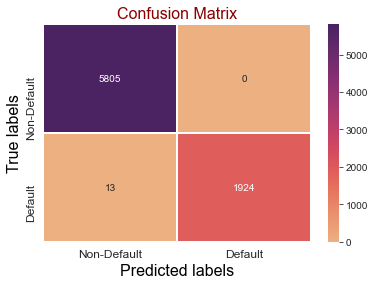

Confusion matrix values
 [[5805    0]
 [  13 1924]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.993     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.664%


In [100]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_smote_xg=metrics.confusion_matrix(joint_y_test,y_test_pred_jnt_smote_xg)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_smote_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_smote_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_jnt_smote_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_test_pred_jnt_smote_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Explainability of the result

In [102]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_xg = SmartExplainer()
xpl_jnt_xg.compile(
    x=joint_X_test,
    model=xg_clf_joint_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 0.72 seconds.


In [103]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_jnt_smote_xg=pd.Series(y_test_pred_jnt_smote_xg)
y_test_pred_jnt_smote_xg.index=joint_y_test.index
y_test_pred_jnt_smote_xg.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [104]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_xg_jnt = xpl_jnt_xg.to_smartpredictor()
predictor_xg_jnt.add_input(x=joint_X_test, ypred=y_test_pred_jnt_smote_xg)
detailed_contributions_jnt_xg = predictor_xg_jnt.detail_contributions()
detailed_contributions_jnt_xg.head()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 1.65 seconds.


In [105]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_xg_jnt.modify_mask(max_contrib=5)
explanation_jnt_xg = predictor_xg_jnt.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 2.08 seconds.


In [106]:
# top 5 rows of explanation of the prediction result
explanation_jnt_xg.head()

ypred     proba        feature_1   value_1 contribution_1  \
6721       0  0.999254  last_pymnt_amnt -0.512668       3.687037   
12582      0  0.999989  total_rec_prncp  0.865899        6.78878   
19905      0  0.999965  total_rec_prncp  2.176909       6.563441   
13375      0  0.999952  total_rec_prncp  0.428895       4.786751   
1284       0  0.999960  last_pymnt_amnt  0.196311       4.567988   

             feature_2   value_2 contribution_2                 feature_3  \
6721         loan_amnt -1.151138       2.992386  sec_app_earliest_cr_line   
12582  last_pymnt_amnt  0.503974       4.210927                 loan_amnt   
19905  last_pymnt_amnt   2.79701       3.542202                 loan_amnt   
13375  last_pymnt_amnt  0.126667        4.13075             total_rec_int   
1284   total_rec_prncp -0.008108       3.186347                 loan_amnt   

        value_3 contribution_3           feature_4   value_4 contribution_4  \
6721   122007.0      -0.612696     total_rec_prncp -0.687649       0.592937   
12582  0.571947      -1.196287  last_credit_pull_d  102018.0       0.773837   
19905  2.026027      -1.620512         installment  1.237289      -0.531383   
13375  2.091195      -0.824745  last_credit_pull_d  102018.0       0.640176   
1284   -0.39744       0.529886       total_rec_int -0.482155       0.416504   

              feature_5   value_5 contribution_5  
6721        installment -0.988792       0.447712  
12582     total_rec_int  2.403174      -0.654121  
19905  earliest_cr_line   82008.0       0.381361  
13375       installment  -0.34296       0.478059  
1284   earliest_cr_line   72010.0       0.322196

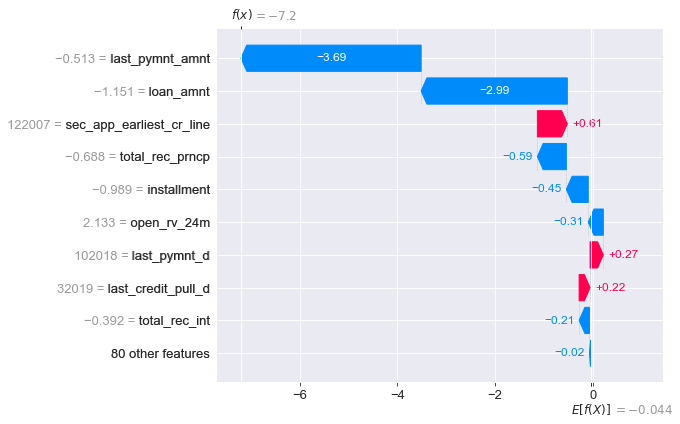


 Time taken: 0 hours 0 minutes and 1.83 seconds.


In [107]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_jnt_xg = shap.Explainer(xg_clf_joint_smote)
shap_values_jnt_xg = explainer_jnt_xg(joint_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_jnt_xg[0])

timer(start_time)   # end time

In [108]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_xg[0])

### LightGBM Model

#### Model Learning

In [111]:
# initializing the classifier
lgbm_clf_jnt_smote=LGBMClassifier(random_state=100)

# fitting the model on resampled dataset
lgbm_clf_jnt_smote.fit(jnt_X_train_smote,jnt_y_train_smote)

LGBMClassifier(random_state=100)

In [113]:
# prediction for resampled dataset
y_pred_train_jnt_smote_lg=lgbm_clf_jnt_smote.predict(jnt_X_train_smote)

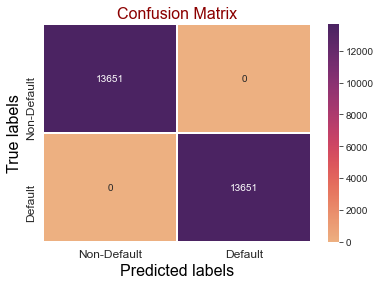

Confusion matrix values
 [[13651     0]
 [    0 13651]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     13651

    accuracy                          1.000     27302
   macro avg      1.000     1.000     1.000     27302
weighted avg      1.000     1.000     1.000     27302



ROC_AUC score : 100.0%


In [114]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_smote_lg=metrics.confusion_matrix(jnt_y_train_smote,y_pred_train_jnt_smote_lg)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_smote_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_smote_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(jnt_y_train_smote,y_pred_train_jnt_smote_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(jnt_y_train_smote,y_pred_train_jnt_smote_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [115]:
y_pred_test_jnt_smote_lg=lgbm_clf_jnt_smote.predict(joint_X_test)

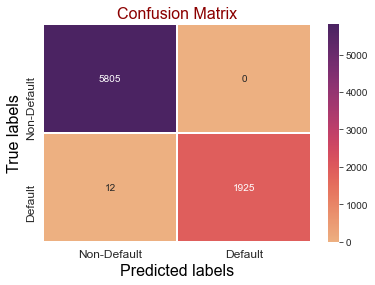

Confusion matrix values
 [[5805    0]
 [  12 1925]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.69%


In [116]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_smote_lg=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_smote_lg)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_smote_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_smote_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_smote_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_smote_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Explainability of the result

In [117]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_lg = SmartExplainer()
xpl_jnt_lg.compile(
    x=joint_X_test,
    model=lgbm_clf_jnt_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 1.57 seconds.


In [118]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_jnt_smote_lg=pd.Series(y_pred_test_jnt_smote_lg)
y_test_pred_jnt_smote_lg.index=joint_y_test.index
y_test_pred_jnt_smote_lg.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [119]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_lg_jnt = xpl_jnt_lg.to_smartpredictor()
predictor_lg_jnt.add_input(x=joint_X_test, ypred=y_test_pred_jnt_smote_lg)
detailed_contributions_jnt_lg = predictor_lg_jnt.detail_contributions()


timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 3.12 seconds.


In [120]:
# top 5 rows of the feature contribution for the test prediction
detailed_contributions_jnt_lg.head()

ypred     proba loan_amnt      term  int_rate installment     grade  \
6721       0  0.998569  2.507751 -0.000069    0.0138    0.600215  0.000213   
12582      0  0.999949 -0.415395  0.002681  0.032862     0.05275 -0.000416   
19905      0  0.999965 -0.362799  0.000203  0.000778   -0.136262 -0.000014   
13375      0  0.999934  0.020411  0.002681  0.030626    0.171791 -0.000416   
1284       0  0.999967  0.404624 -0.000474  0.004596     0.12635 -0.002728   

      sub_grade emp_title emp_length home_ownership annual_inc  \
6721   0.002015 -0.018003  -0.011075            0.0   -0.03837   
12582  0.009598 -0.001394   0.004298            0.0  -0.007312   
19905  0.002394  0.003077   0.003252            0.0  -0.001865   
13375  0.003058 -0.031736  -0.009851            0.0  -0.045191   
1284   0.001705  0.001147  -0.001091            0.0  -0.031327   

      verification_status   issue_d   purpose     title  zip_code addr_state  \
6721            -0.022677   0.00674  0.012885  0.003302 -0.877611   0.002529   
12582             0.00535  0.007507  0.000075  0.001638  0.022755   0.002971   
19905           -0.000797 -0.102247   0.00013  0.002422 -0.062433  -0.013411   
13375           -0.000668  0.052692  0.000075  0.005401  0.185129   0.003837   
1284            -0.000064  0.009152   0.00013  0.001685  0.041688   0.013385   

            dti earliest_cr_line inq_last_6mths  open_acc revol_bal  \
6721   0.012937         -0.11235      -0.000994  0.008006 -0.012038   
12582  0.001519         0.067383         0.0297  0.002329 -0.009995   
19905  0.004175         0.074147       0.007971 -0.057861  0.039478   
13375  0.001405        -0.331393       0.001174 -0.000326 -0.023141   
1284    0.00123         0.050245      -0.000084  0.003153 -0.003829   

      revol_util total_acc initial_list_status total_pymnt total_pymnt_inv  \
6721   -0.000109  0.000466             0.00412    0.014737       -0.002376   
12582   0.000345 -0.003082            0.012753   -0.007164        0.002857   
19905  -0.000073  0.001074            0.009415    0.022886        0.002383   
13375   0.007178 -0.000701            0.004514   -0.006459        0.002857   
1284   -0.001241  0.003659            0.010042   -0.007664       -0.001973   

      total_rec_prncp total_rec_int last_pymnt_d last_pymnt_amnt  \
6721          1.87085      0.048548    -0.140201        3.345335   
12582        5.969593     -0.291924    -0.062679        4.873176   
19905        5.905294      0.086148     0.001807        4.928267   
13375        5.144381     -0.248089    -0.079427        5.140862   
1284         4.222453      0.178097    -0.006208        5.529496   

      last_credit_pull_d annual_inc_joint dti_joint verification_status_joint  \
6721           -0.156726         0.051953   0.00026                  0.038357   
12582           0.329148         0.003766  0.001165                  -0.00097   
19905           0.020557         0.002091  0.002511                  0.001281   
13375           0.084764         0.004892  0.001043                  -0.00097   
1284            0.047712         0.007404  0.002389                  -0.00129   

      tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m  \
6721      0.00305   -0.221728    0.082126   -0.014001   -0.000597   
12582    -0.00714   -0.245996    0.010892    0.004703    0.001258   
19905    0.057854   -0.011296    0.045005     0.00596    0.001075   
13375   -0.008944    0.015943    0.043009    0.007023    0.001609   
1284      -0.0026    0.014478    0.000545   -0.000424     0.00051   

      mths_since_rcnt_il total_bal_il   il_util open_rv_12m open_rv_24m  \
6721           -0.000919     0.037976 -0.075716   -0.005303    0.030581   
12582          -0.074163     0.005617  0.006023    0.006231     0.00982   
19905           0.007825     0.002933 -0.020651   -0.002626   -0.018319   
13375           -0.00111     0.003343  -0.01684    0.007741    -0.00565   
1284           -0.001379     0.002491    0.0034    0.006579   -0.001333   

  

In [121]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_lg_jnt.modify_mask(max_contrib=5)
explanation_jnt_lg = predictor_lg_jnt.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 1.94 seconds.


In [122]:
# top 5 rows for the top 5 feature contribution of the prediction result of the test dataset
explanation_jnt_lg.head()

ypred     proba        feature_1   value_1 contribution_1  \
6721       0  0.998569  last_pymnt_amnt -0.512668       3.345335   
12582      0  0.999949  total_rec_prncp  0.865899       5.969593   
19905      0  0.999965  total_rec_prncp  2.176909       5.905294   
13375      0  0.999934  total_rec_prncp  0.428895       5.144381   
1284       0  0.999967  last_pymnt_amnt  0.196311       5.529496   

             feature_2   value_2 contribution_2         feature_3   value_3  \
6721         loan_amnt -1.151138       2.507751   total_rec_prncp -0.687649   
12582  last_pymnt_amnt  0.503974       4.873176         loan_amnt  0.571947   
19905  last_pymnt_amnt   2.79701       4.928267         loan_amnt  2.026027   
13375  last_pymnt_amnt  0.126667       5.140862  earliest_cr_line   11989.0   
1284   total_rec_prncp -0.008108       4.222453         loan_amnt  -0.39744   

      contribution_3           feature_4   value_4 contribution_4  \
6721         1.87085            zip_code -1.812156      -0.877611   
12582      -0.415395  last_credit_pull_d  102018.0       0.329148   
19905      -0.362799         installment  1.237289      -0.136262   
13375      -0.331393       total_rec_int  2.091195      -0.248089   
1284        0.404624       total_rec_int -0.482155       0.178097   

           feature_5   value_5 contribution_5  
6721     installment -0.988792       0.600215  
12582  total_rec_int  2.403174      -0.291924  
19905        issue_d  122017.0      -0.102247  
13375       zip_code -1.076406       0.185129  
1284     installment -0.212081        0.12635

In [123]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_jnt_lg = shap.Explainer(lgbm_clf_jnt_smote)
shap_values_jnt_lg = explainer_jnt_lg(joint_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_jnt_lg[0])

timer(start_time)   # end time

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

### Catboost Model

#### Model Learning

In [124]:
# initializing the classifier
cat_clf_joint_smote=CatBoostClassifier(random_state=100)

# fitting the model
cat_clf_joint_smote.fit(jnt_X_train_smote,jnt_y_train_smote)

Learning rate set to 0.042285
0:	learn: 0.5825149	total: 23.8ms	remaining: 23.7s
1:	learn: 0.4820424	total: 47.1ms	remaining: 23.5s
2:	learn: 0.4119728	total: 71.6ms	remaining: 23.8s
3:	learn: 0.3451627	total: 91ms	remaining: 22.7s
4:	learn: 0.3048452	total: 110ms	remaining: 21.9s
5:	learn: 0.2567627	total: 130ms	remaining: 21.5s
6:	learn: 0.2258537	total: 148ms	remaining: 21s
7:	learn: 0.1907559	total: 169ms	remaining: 21s
8:	learn: 0.1657915	total: 190ms	remaining: 20.9s
9:	learn: 0.1471314	total: 210ms	remaining: 20.8s
10:	learn: 0.1292728	total: 231ms	remaining: 20.7s
11:	learn: 0.1150735	total: 250ms	remaining: 20.5s
12:	learn: 0.1036536	total: 269ms	remaining: 20.4s
13:	learn: 0.0911323	total: 287ms	remaining: 20.2s
14:	learn: 0.0815460	total: 307ms	remaining: 20.2s
15:	learn: 0.0756967	total: 328ms	remaining: 20.1s
16:	learn: 0.0698311	total: 348ms	remaining: 20.1s
17:	learn: 0.0647529	total: 369ms	remaining: 20.1s
18:	learn: 0.0602002	total: 389ms	remaining: 20.1s
19:	learn: 0.

161:	learn: 0.0063377	total: 3.11s	remaining: 16.1s
162:	learn: 0.0063253	total: 3.13s	remaining: 16.1s
163:	learn: 0.0062820	total: 3.15s	remaining: 16.1s
164:	learn: 0.0062562	total: 3.17s	remaining: 16.1s
165:	learn: 0.0062366	total: 3.19s	remaining: 16s
166:	learn: 0.0061909	total: 3.21s	remaining: 16s
167:	learn: 0.0061759	total: 3.23s	remaining: 16s
168:	learn: 0.0061518	total: 3.25s	remaining: 16s
169:	learn: 0.0061353	total: 3.27s	remaining: 16s
170:	learn: 0.0061016	total: 3.29s	remaining: 15.9s
171:	learn: 0.0060453	total: 3.31s	remaining: 15.9s
172:	learn: 0.0060277	total: 3.33s	remaining: 15.9s
173:	learn: 0.0059968	total: 3.35s	remaining: 15.9s
174:	learn: 0.0059542	total: 3.37s	remaining: 15.9s
175:	learn: 0.0059304	total: 3.38s	remaining: 15.8s
176:	learn: 0.0059128	total: 3.4s	remaining: 15.8s
177:	learn: 0.0058918	total: 3.42s	remaining: 15.8s
178:	learn: 0.0058784	total: 3.44s	remaining: 15.8s
179:	learn: 0.0058642	total: 3.46s	remaining: 15.8s
180:	learn: 0.0058518	t

324:	learn: 0.0029319	total: 6.22s	remaining: 12.9s
325:	learn: 0.0029319	total: 6.24s	remaining: 12.9s
326:	learn: 0.0029319	total: 6.26s	remaining: 12.9s
327:	learn: 0.0029319	total: 6.28s	remaining: 12.9s
328:	learn: 0.0029274	total: 6.3s	remaining: 12.8s
329:	learn: 0.0029138	total: 6.31s	remaining: 12.8s
330:	learn: 0.0028920	total: 6.33s	remaining: 12.8s
331:	learn: 0.0028920	total: 6.35s	remaining: 12.8s
332:	learn: 0.0028918	total: 6.37s	remaining: 12.8s
333:	learn: 0.0028918	total: 6.38s	remaining: 12.7s
334:	learn: 0.0028874	total: 6.4s	remaining: 12.7s
335:	learn: 0.0028874	total: 6.42s	remaining: 12.7s
336:	learn: 0.0028874	total: 6.43s	remaining: 12.7s
337:	learn: 0.0028873	total: 6.45s	remaining: 12.6s
338:	learn: 0.0028873	total: 6.46s	remaining: 12.6s
339:	learn: 0.0028873	total: 6.48s	remaining: 12.6s
340:	learn: 0.0028873	total: 6.51s	remaining: 12.6s
341:	learn: 0.0028873	total: 6.53s	remaining: 12.6s
342:	learn: 0.0028873	total: 6.54s	remaining: 12.5s
343:	learn: 0.

483:	learn: 0.0027453	total: 8.86s	remaining: 9.45s
484:	learn: 0.0027453	total: 8.88s	remaining: 9.43s
485:	learn: 0.0027453	total: 8.9s	remaining: 9.41s
486:	learn: 0.0027453	total: 8.91s	remaining: 9.39s
487:	learn: 0.0027453	total: 8.93s	remaining: 9.37s
488:	learn: 0.0027453	total: 8.95s	remaining: 9.35s
489:	learn: 0.0027453	total: 8.96s	remaining: 9.33s
490:	learn: 0.0027453	total: 8.98s	remaining: 9.31s
491:	learn: 0.0027453	total: 9s	remaining: 9.29s
492:	learn: 0.0027453	total: 9.02s	remaining: 9.27s
493:	learn: 0.0027453	total: 9.03s	remaining: 9.25s
494:	learn: 0.0027453	total: 9.05s	remaining: 9.23s
495:	learn: 0.0027453	total: 9.06s	remaining: 9.21s
496:	learn: 0.0027453	total: 9.08s	remaining: 9.19s
497:	learn: 0.0027453	total: 9.1s	remaining: 9.17s
498:	learn: 0.0027453	total: 9.11s	remaining: 9.15s
499:	learn: 0.0027453	total: 9.13s	remaining: 9.13s
500:	learn: 0.0027453	total: 9.15s	remaining: 9.11s
501:	learn: 0.0027453	total: 9.16s	remaining: 9.09s
502:	learn: 0.002

644:	learn: 0.0027072	total: 11.5s	remaining: 6.34s
645:	learn: 0.0027072	total: 11.5s	remaining: 6.32s
646:	learn: 0.0027072	total: 11.6s	remaining: 6.3s
647:	learn: 0.0027072	total: 11.6s	remaining: 6.28s
648:	learn: 0.0027072	total: 11.6s	remaining: 6.26s
649:	learn: 0.0027072	total: 11.6s	remaining: 6.24s
650:	learn: 0.0027071	total: 11.6s	remaining: 6.22s
651:	learn: 0.0027071	total: 11.6s	remaining: 6.21s
652:	learn: 0.0027071	total: 11.6s	remaining: 6.18s
653:	learn: 0.0027071	total: 11.7s	remaining: 6.17s
654:	learn: 0.0027071	total: 11.7s	remaining: 6.15s
655:	learn: 0.0027071	total: 11.7s	remaining: 6.13s
656:	learn: 0.0027071	total: 11.7s	remaining: 6.11s
657:	learn: 0.0027071	total: 11.7s	remaining: 6.09s
658:	learn: 0.0027071	total: 11.7s	remaining: 6.07s
659:	learn: 0.0027071	total: 11.8s	remaining: 6.05s
660:	learn: 0.0027071	total: 11.8s	remaining: 6.04s
661:	learn: 0.0027070	total: 11.8s	remaining: 6.01s
662:	learn: 0.0027070	total: 11.8s	remaining: 6s
663:	learn: 0.00

813:	learn: 0.0026846	total: 14.3s	remaining: 3.27s
814:	learn: 0.0026846	total: 14.3s	remaining: 3.25s
815:	learn: 0.0026846	total: 14.3s	remaining: 3.23s
816:	learn: 0.0026846	total: 14.4s	remaining: 3.22s
817:	learn: 0.0026846	total: 14.4s	remaining: 3.2s
818:	learn: 0.0026846	total: 14.4s	remaining: 3.18s
819:	learn: 0.0026846	total: 14.4s	remaining: 3.16s
820:	learn: 0.0026846	total: 14.4s	remaining: 3.15s
821:	learn: 0.0026846	total: 14.4s	remaining: 3.13s
822:	learn: 0.0026846	total: 14.5s	remaining: 3.11s
823:	learn: 0.0026846	total: 14.5s	remaining: 3.09s
824:	learn: 0.0026846	total: 14.5s	remaining: 3.07s
825:	learn: 0.0026846	total: 14.5s	remaining: 3.06s
826:	learn: 0.0026846	total: 14.5s	remaining: 3.04s
827:	learn: 0.0026845	total: 14.5s	remaining: 3.02s
828:	learn: 0.0026845	total: 14.5s	remaining: 3s
829:	learn: 0.0026845	total: 14.6s	remaining: 2.98s
830:	learn: 0.0026845	total: 14.6s	remaining: 2.96s
831:	learn: 0.0026845	total: 14.6s	remaining: 2.94s
832:	learn: 0.00

977:	learn: 0.0026799	total: 17s	remaining: 382ms
978:	learn: 0.0026799	total: 17s	remaining: 364ms
979:	learn: 0.0026799	total: 17s	remaining: 347ms
980:	learn: 0.0026799	total: 17s	remaining: 330ms
981:	learn: 0.0026725	total: 17s	remaining: 312ms
982:	learn: 0.0026724	total: 17.1s	remaining: 295ms
983:	learn: 0.0026724	total: 17.1s	remaining: 278ms
984:	learn: 0.0026724	total: 17.1s	remaining: 260ms
985:	learn: 0.0026724	total: 17.1s	remaining: 243ms
986:	learn: 0.0026724	total: 17.1s	remaining: 225ms
987:	learn: 0.0026724	total: 17.1s	remaining: 208ms
988:	learn: 0.0026724	total: 17.1s	remaining: 191ms
989:	learn: 0.0026724	total: 17.2s	remaining: 173ms
990:	learn: 0.0026724	total: 17.2s	remaining: 156ms
991:	learn: 0.0026724	total: 17.2s	remaining: 139ms
992:	learn: 0.0026724	total: 17.2s	remaining: 121ms
993:	learn: 0.0026724	total: 17.2s	remaining: 104ms
994:	learn: 0.0026724	total: 17.2s	remaining: 86.7ms
995:	learn: 0.0026724	total: 17.3s	remaining: 69.3ms
996:	learn: 0.002672

In [125]:
# prediction of smote train dataset 
y_train_pred_jnt_smote_cat=cat_clf_joint_smote.predict(jnt_X_train_smote)

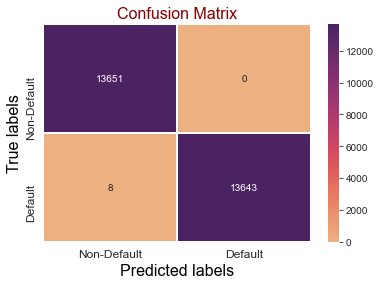

Confusion matrix values
 [[13651     0]
 [    8 13643]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000     13651
           1      1.000     0.999     1.000     13651

    accuracy                          1.000     27302
   macro avg      1.000     1.000     1.000     27302
weighted avg      1.000     1.000     1.000     27302



ROC_AUC score : 99.971%


In [126]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_jnt_smote_cat=metrics.confusion_matrix(jnt_y_train_smote,y_train_pred_jnt_smote_cat)

ax= plt.subplot()
sns.heatmap(cm_jnt_smote_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_jnt_smote_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(jnt_y_train_smote,y_train_pred_jnt_smote_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(jnt_y_train_smote,y_train_pred_jnt_smote_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [127]:
# prediction for test dataset using smote classifier
y_test_pred_jnt_smote_cat=cat_clf_joint_smote.predict(joint_X_test)

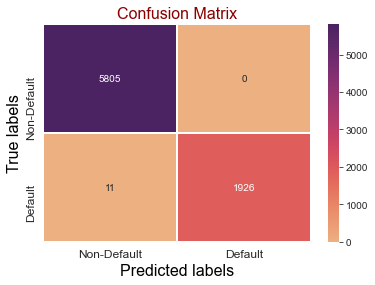

Confusion matrix values
 [[5805    0]
 [  11 1926]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.999      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.999     0.999     0.999      7742



ROC_AUC score : 99.716%


In [128]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_smote_cat=metrics.confusion_matrix(joint_y_test,y_test_pred_jnt_smote_cat)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_smote_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_smote_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_jnt_smote_cat,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_test_pred_jnt_smote_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Explainability of the result

In [129]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_jnt_cat = SmartExplainer()
xpl_jnt_cat.compile(
    x=joint_X_test,
    model=cat_clf_joint_smote,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 1.98 seconds.


In [130]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_jnt_smote_cat=pd.Series(y_test_pred_jnt_smote_cat)
y_test_pred_jnt_smote_cat.index=joint_y_test.index
y_test_pred_jnt_smote_cat.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [131]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_cat_jnt = xpl_jnt_cat.to_smartpredictor()
predictor_cat_jnt.add_input(x=joint_X_test, ypred=y_test_pred_jnt_smote_cat)
detailed_contributions_jnt_cat = predictor_cat_jnt.detail_contributions()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 4.5 seconds.


In [132]:
detailed_contributions_jnt_cat.head()

ypred     proba loan_amnt term  int_rate installment     grade  \
6721       0  0.998495  4.092788 -0.0 -0.002513     1.08609  0.015983   
12582      0  0.998869 -1.086833 -0.0  0.004682   -0.000054 -0.004758   
19905      0  0.999534 -1.847815 -0.0 -0.022859   -0.611268   -0.0036   
13375      0  0.998211 -0.173876 -0.0 -0.012707   -0.022128 -0.013729   
1284       0  0.999582   0.66507 -0.0 -0.024077    0.045091 -0.015792   

      sub_grade emp_title emp_length home_ownership annual_inc  \
6721  -0.013961   0.15906  -0.001291       0.038864  -0.032177   
12582 -0.002331 -0.019175   0.001897       0.007971  -0.018489   
19905 -0.015142 -0.016842   0.001498       0.003576   -0.03375   
13375  0.001111  -0.02801   0.001422       0.007971  -0.031762   
1284  -0.010979 -0.013341  -0.002594       0.009602  -0.018367   

      verification_status   issue_d   purpose     title  zip_code addr_state  \
6721            -0.000671 -0.012157 -0.000093 -0.000636  0.121579  -0.012614   
12582            0.014892  0.080359 -0.001082 -0.004543 -0.017187   -0.01032   
19905           -0.000671 -0.005191 -0.000027 -0.003191 -0.023876   0.025533   
13375            -0.00706  0.115594 -0.000761 -0.002877 -0.006637   0.045679   
1284            -0.002112  0.041587  0.000266 -0.002653  0.094547   0.003305   

            dti earliest_cr_line inq_last_6mths  open_acc revol_bal  \
6721   -0.00687        -0.095819      -0.025618  0.033038 -0.006571   
12582 -0.004949          0.08384       0.029611 -0.002946  0.006262   
19905  0.007857          0.06096       0.013983  0.088287 -0.004772   
13375  0.000682        -0.071924         0.0304 -0.008561  0.005613   
1284  -0.000278         0.056021      -0.030394  0.001072 -0.006175   

      revol_util total_acc initial_list_status total_pymnt total_pymnt_inv  \
6721   -0.031382  0.123132            0.004222   -0.070929        0.048012   
12582  -0.000308 -0.008855           -0.000708    0.321879        0.410573   
19905  -0.007247 -0.008194            0.000127    0.429139        0.582095   
13375    -0.0012 -0.004683           -0.001603    0.114087        0.366822   
1284   -0.024903  0.003936           -0.001764    -0.01246        0.191071   

      total_rec_prncp total_rec_int last_pymnt_d last_pymnt_amnt  \
6721        -0.109153       0.08505    -0.352095        3.109177   
12582         6.79097     -0.823167    -0.189385        2.610305   
19905        7.378556      0.045514     0.092804        2.556704   
13375        5.653188     -0.775669    -0.153445        2.675307   
1284         4.223626      0.091614     0.227597        2.961993   

      last_credit_pull_d annual_inc_joint dti_joint verification_status_joint  \
6721           -0.223049         0.055623  0.000627                  0.023277   
12582           0.403484          0.00557 -0.005357                 -0.004871   
19905          -0.042659         0.015081  0.009656                  0.019053   
13375            0.41283          0.01817 -0.007232                 -0.008636   
1284            0.376671        -0.028353  0.005986                 -0.003535   

      tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m  \
6721     0.008281   -0.044297    0.016503    0.066691    0.015536   
12582    0.003895   -0.090377    0.019868    0.022804   -0.000514   
19905    0.000021   -0.049734    0.012862    0.002548    0.001657   
13375    0.023775    0.034388    0.000757    0.017114   -0.000514   
1284    -0.029285    0.028614   -0.000263    0.031843   -0.000514   

      mths_since_rcnt_il total_bal_il   il_util open_rv_12m open_rv_24m  \
6721            0.010679    -0.007197 -0.016661    0.066313    0.028988   
12582           0.051271    -0.003264  0.024029    0.014128    -0.02384   
19905           0.040731    -0.047895 -0.023937    0.059002    0.042723   
13375            0.00625    -0.002483 -0.021457    0.039704   -0.025153   
1284            0.024941    -0.037868  -0.01396    0.053513   -0.016463   

      max_bal_bc  all_util total

In [134]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_cat_jnt.modify_mask(max_contrib=5)
explanation_jnt_cat = predictor_cat_jnt.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 2.04 seconds.


In [135]:
# top 5 rows for the top 5 feature contribution of the prediction result of the test dataset
explanation_jnt_cat.head()

ypred     proba        feature_1   value_1 contribution_1  \
6721       0  0.998495        loan_amnt -1.151138       4.092788   
12582      0  0.998869  total_rec_prncp  0.865899        6.79097   
19905      0  0.999534  total_rec_prncp  2.176909       7.378556   
13375      0  0.998211  total_rec_prncp  0.428895       5.653188   
1284       0  0.999582  total_rec_prncp -0.008108       4.223626   

             feature_2   value_2 contribution_2      feature_3   value_3  \
6721   last_pymnt_amnt -0.512668       3.109177    installment -0.988792   
12582  last_pymnt_amnt  0.503974       2.610305      loan_amnt  0.571947   
19905  last_pymnt_amnt   2.79701       2.556704      loan_amnt  2.026027   
13375  last_pymnt_amnt  0.126667       2.675307  total_rec_int  2.091195   
1284   last_pymnt_amnt  0.196311       2.961993      loan_amnt  -0.39744   

      contribution_3           feature_4   value_4 contribution_4  \
6721         1.08609        last_pymnt_d  102018.0      -0.352095   
12582      -1.086833       total_rec_int  2.403174      -0.823167   
19905      -1.847815         installment  1.237289      -0.611268   
13375      -0.775669  last_credit_pull_d  102018.0        0.41283   
1284         0.66507  last_credit_pull_d  112018.0       0.376671   

                    feature_5   value_5 contribution_5  
6721       last_credit_pull_d   32019.0      -0.223049  
12582         total_pymnt_inv  1.137419       0.410573  
19905         total_pymnt_inv  1.942313       0.582095  
13375         total_pymnt_inv  0.679369       0.366822  
1284   sec_app_inq_last_6mths -1.079269       0.230887

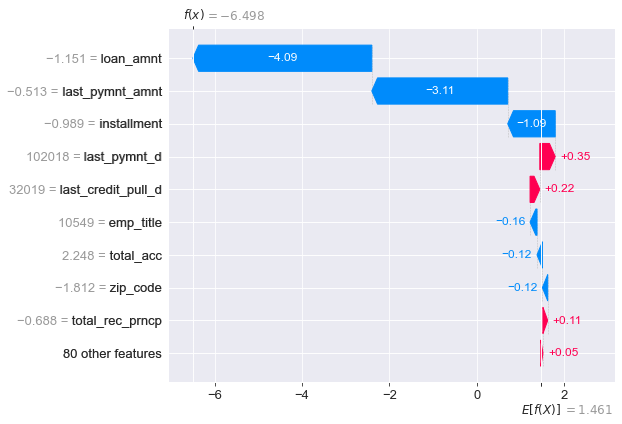


 Time taken: 0 hours 0 minutes and 2.85 seconds.


In [136]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explanation_jnt_cat = shap.Explainer(cat_clf_joint_smote)
shap_values_jnt_cat = explanation_jnt_cat(joint_X_test)
shap.plots.waterfall(shap_values_jnt_cat[0])

timer(start_time)   # end time

In [137]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_cat[0])

### Stacking Model

#### Model Learning

In [138]:
# initializing the classifiers

clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
sclf_joint_smote = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

# fitting the model on resampled train dataset
sclf_joint_smote.fit(jnt_X_train_smote,jnt_y_train_smote)

[19:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.042285
0:	learn: 0.5825149	total: 20.4ms	remaining: 20.4s
1:	learn: 0.4820424	total: 40.2ms	remaining: 20s
2:	learn: 0.4119728	total: 60.2ms	remaining: 20s
3:	learn: 0.3451627	total: 79.1ms	remaining: 19.7s
4:	learn: 0.3048452	total: 98.3ms	remaining: 19.6s
5:	learn: 0.2567627	total: 120ms	remaining: 19.8s
6:	learn: 0.2258537	total: 140ms	remaining: 19.9s
7:	learn: 0.1907559	total: 161ms	remaining: 20s
8:	learn: 0.1657915	total: 182ms	remaining: 20s
9:	learn: 0.1471314	total: 203ms	remaining: 20.1s
10:	learn: 0.1292728	total: 222ms	remaining: 20s
11:	learn: 0.1150735	total: 242ms	remaining: 19.9s
12:	learn: 0.1036536	total: 262ms	remaining: 19.9s
13:	learn: 0

157:	learn: 0.0065251	total: 3.08s	remaining: 16.4s
158:	learn: 0.0064342	total: 3.1s	remaining: 16.4s
159:	learn: 0.0064010	total: 3.12s	remaining: 16.4s
160:	learn: 0.0063769	total: 3.14s	remaining: 16.4s
161:	learn: 0.0063377	total: 3.16s	remaining: 16.3s
162:	learn: 0.0063253	total: 3.18s	remaining: 16.3s
163:	learn: 0.0062820	total: 3.19s	remaining: 16.3s
164:	learn: 0.0062562	total: 3.21s	remaining: 16.3s
165:	learn: 0.0062366	total: 3.23s	remaining: 16.2s
166:	learn: 0.0061909	total: 3.25s	remaining: 16.2s
167:	learn: 0.0061759	total: 3.27s	remaining: 16.2s
168:	learn: 0.0061518	total: 3.29s	remaining: 16.2s
169:	learn: 0.0061353	total: 3.31s	remaining: 16.2s
170:	learn: 0.0061016	total: 3.33s	remaining: 16.2s
171:	learn: 0.0060453	total: 3.36s	remaining: 16.2s
172:	learn: 0.0060277	total: 3.38s	remaining: 16.1s
173:	learn: 0.0059968	total: 3.4s	remaining: 16.1s
174:	learn: 0.0059542	total: 3.42s	remaining: 16.1s
175:	learn: 0.0059304	total: 3.44s	remaining: 16.1s
176:	learn: 0.

325:	learn: 0.0029319	total: 6.43s	remaining: 13.3s
326:	learn: 0.0029319	total: 6.44s	remaining: 13.3s
327:	learn: 0.0029319	total: 6.46s	remaining: 13.2s
328:	learn: 0.0029274	total: 6.48s	remaining: 13.2s
329:	learn: 0.0029138	total: 6.5s	remaining: 13.2s
330:	learn: 0.0028920	total: 6.51s	remaining: 13.2s
331:	learn: 0.0028920	total: 6.53s	remaining: 13.1s
332:	learn: 0.0028918	total: 6.55s	remaining: 13.1s
333:	learn: 0.0028918	total: 6.57s	remaining: 13.1s
334:	learn: 0.0028874	total: 6.58s	remaining: 13.1s
335:	learn: 0.0028874	total: 6.6s	remaining: 13s
336:	learn: 0.0028874	total: 6.62s	remaining: 13s
337:	learn: 0.0028873	total: 6.64s	remaining: 13s
338:	learn: 0.0028873	total: 6.65s	remaining: 13s
339:	learn: 0.0028873	total: 6.67s	remaining: 12.9s
340:	learn: 0.0028873	total: 6.68s	remaining: 12.9s
341:	learn: 0.0028873	total: 6.7s	remaining: 12.9s
342:	learn: 0.0028873	total: 6.72s	remaining: 12.9s
343:	learn: 0.0028873	total: 6.73s	remaining: 12.8s
344:	learn: 0.0028787	t

485:	learn: 0.0027453	total: 9.08s	remaining: 9.61s
486:	learn: 0.0027453	total: 9.1s	remaining: 9.59s
487:	learn: 0.0027453	total: 9.12s	remaining: 9.56s
488:	learn: 0.0027453	total: 9.13s	remaining: 9.54s
489:	learn: 0.0027453	total: 9.15s	remaining: 9.52s
490:	learn: 0.0027453	total: 9.16s	remaining: 9.5s
491:	learn: 0.0027453	total: 9.18s	remaining: 9.48s
492:	learn: 0.0027453	total: 9.19s	remaining: 9.45s
493:	learn: 0.0027453	total: 9.21s	remaining: 9.43s
494:	learn: 0.0027453	total: 9.22s	remaining: 9.41s
495:	learn: 0.0027453	total: 9.24s	remaining: 9.39s
496:	learn: 0.0027453	total: 9.26s	remaining: 9.37s
497:	learn: 0.0027453	total: 9.27s	remaining: 9.35s
498:	learn: 0.0027453	total: 9.29s	remaining: 9.33s
499:	learn: 0.0027453	total: 9.31s	remaining: 9.31s
500:	learn: 0.0027453	total: 9.32s	remaining: 9.29s
501:	learn: 0.0027453	total: 9.34s	remaining: 9.27s
502:	learn: 0.0027453	total: 9.36s	remaining: 9.24s
503:	learn: 0.0027453	total: 9.37s	remaining: 9.22s
504:	learn: 0.

644:	learn: 0.0027072	total: 11.8s	remaining: 6.48s
645:	learn: 0.0027072	total: 11.8s	remaining: 6.46s
646:	learn: 0.0027072	total: 11.8s	remaining: 6.44s
647:	learn: 0.0027072	total: 11.8s	remaining: 6.42s
648:	learn: 0.0027072	total: 11.8s	remaining: 6.4s
649:	learn: 0.0027072	total: 11.8s	remaining: 6.38s
650:	learn: 0.0027071	total: 11.9s	remaining: 6.36s
651:	learn: 0.0027071	total: 11.9s	remaining: 6.34s
652:	learn: 0.0027071	total: 11.9s	remaining: 6.32s
653:	learn: 0.0027071	total: 11.9s	remaining: 6.3s
654:	learn: 0.0027071	total: 11.9s	remaining: 6.29s
655:	learn: 0.0027071	total: 11.9s	remaining: 6.27s
656:	learn: 0.0027071	total: 12s	remaining: 6.25s
657:	learn: 0.0027071	total: 12s	remaining: 6.23s
658:	learn: 0.0027071	total: 12s	remaining: 6.21s
659:	learn: 0.0027071	total: 12s	remaining: 6.19s
660:	learn: 0.0027071	total: 12s	remaining: 6.17s
661:	learn: 0.0027070	total: 12s	remaining: 6.15s
662:	learn: 0.0027070	total: 12.1s	remaining: 6.13s
663:	learn: 0.0027070	tota

804:	learn: 0.0026847	total: 14.4s	remaining: 3.49s
805:	learn: 0.0026847	total: 14.4s	remaining: 3.47s
806:	learn: 0.0026847	total: 14.4s	remaining: 3.45s
807:	learn: 0.0026847	total: 14.5s	remaining: 3.44s
808:	learn: 0.0026847	total: 14.5s	remaining: 3.42s
809:	learn: 0.0026847	total: 14.5s	remaining: 3.4s
810:	learn: 0.0026847	total: 14.5s	remaining: 3.38s
811:	learn: 0.0026847	total: 14.5s	remaining: 3.36s
812:	learn: 0.0026847	total: 14.5s	remaining: 3.35s
813:	learn: 0.0026846	total: 14.6s	remaining: 3.33s
814:	learn: 0.0026846	total: 14.6s	remaining: 3.31s
815:	learn: 0.0026846	total: 14.6s	remaining: 3.29s
816:	learn: 0.0026846	total: 14.6s	remaining: 3.27s
817:	learn: 0.0026846	total: 14.6s	remaining: 3.25s
818:	learn: 0.0026846	total: 14.6s	remaining: 3.23s
819:	learn: 0.0026846	total: 14.7s	remaining: 3.22s
820:	learn: 0.0026846	total: 14.7s	remaining: 3.2s
821:	learn: 0.0026846	total: 14.7s	remaining: 3.18s
822:	learn: 0.0026846	total: 14.7s	remaining: 3.16s
823:	learn: 0.

964:	learn: 0.0026799	total: 17s	remaining: 618ms
965:	learn: 0.0026799	total: 17.1s	remaining: 600ms
966:	learn: 0.0026799	total: 17.1s	remaining: 582ms
967:	learn: 0.0026799	total: 17.1s	remaining: 565ms
968:	learn: 0.0026799	total: 17.1s	remaining: 547ms
969:	learn: 0.0026799	total: 17.1s	remaining: 529ms
970:	learn: 0.0026799	total: 17.1s	remaining: 512ms
971:	learn: 0.0026799	total: 17.2s	remaining: 494ms
972:	learn: 0.0026799	total: 17.2s	remaining: 476ms
973:	learn: 0.0026799	total: 17.2s	remaining: 459ms
974:	learn: 0.0026799	total: 17.2s	remaining: 441ms
975:	learn: 0.0026799	total: 17.2s	remaining: 423ms
976:	learn: 0.0026799	total: 17.2s	remaining: 406ms
977:	learn: 0.0026799	total: 17.3s	remaining: 388ms
978:	learn: 0.0026799	total: 17.3s	remaining: 370ms
979:	learn: 0.0026799	total: 17.3s	remaining: 353ms
980:	learn: 0.0026799	total: 17.3s	remaining: 335ms
981:	learn: 0.0026725	total: 17.3s	remaining: 318ms
982:	learn: 0.0026724	total: 17.3s	remaining: 300ms
983:	learn: 0.

StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=N...
                                 

In [139]:
# prediction for resampled dataset
y_pred_train_jnt_smote_stack=sclf_joint_smote.predict(jnt_X_train_smote)

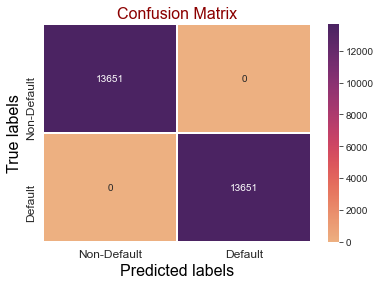

Confusion matrix values
 [[13651     0]
 [    0 13651]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000     13651

    accuracy                          1.000     27302
   macro avg      1.000     1.000     1.000     27302
weighted avg      1.000     1.000     1.000     27302



ROC_AUC score : 100.0%


In [140]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_smote_stack=metrics.confusion_matrix(jnt_y_train_smote,y_pred_train_jnt_smote_stack)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_smote_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_smote_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(jnt_y_train_smote,y_pred_train_jnt_smote_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(jnt_y_train_smote,y_pred_train_jnt_smote_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [141]:
# prediction for test dataset using smote stacking classifier
y_pred_test_jnt_smote_stack=sclf_joint_smote.predict(joint_X_test)

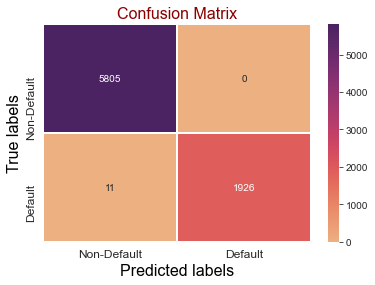

Confusion matrix values
 [[5805    0]
 [  11 1926]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.999      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.999     0.999     0.999      7742



ROC_AUC score : 99.716%


In [143]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_smote_stack=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_smote_stack)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_smote_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_smote_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_smote_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_smote_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# End of the process

In [ ]:
timer(start_time_smote) # end of the process